# <center><font color=black>Machine Learning Project: Default Of Credit Card Clients</font></center>

# Projet Finale
## Realiser par:
### Amine Saidi
### Khaoula Hadrouchi 
### Oumayma Bettaieb
### Said chabchoub 
#### 4DS4


# <font color=#003282> I. Business understanding: </font>

# <a id="1"><font color=#229954>Project Skeleton</font></a> 
 
Before starting out any project, we must first plan our steps and have clarity on what type of problem we are tackling and what tools can be used and what cannot be used and why not?. This "why not" question will help you gain more insights on your ML journey. The following are key points I took into consideration.                  
                                                                                    
                                     
                                                              
>What kind of ML problem statement is it? Try to define it                                    
Understand the type of data?                            
Keep a test data aside for EDA                                   
Relationships between various features, ie EDA                              
Try your intuition about the field:                                       
What are the important features ?                               
Data preprocessing: Building a pipeline for it                                    
Applying models to predict                                
What must be the evaluation metric?                       
Evaluate the model on Test data
> Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data.
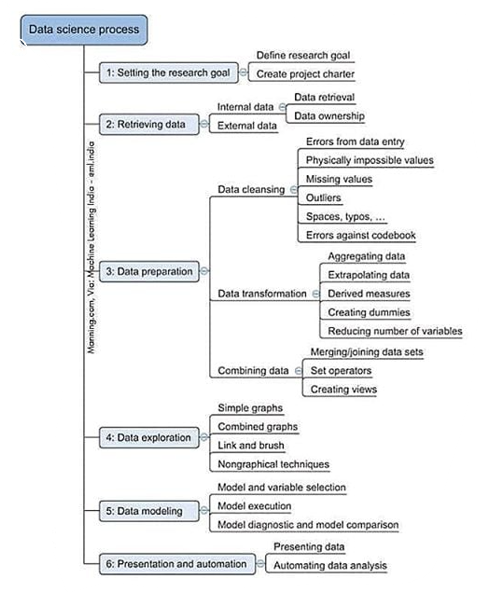

# <font color=#229954>Dataset Information</font></a> 

### Relevant Papers
In their paper "The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. (Yeh I. C. & Lien C. H.,2009)", which can be found here, Yeh I. C. & Lien C. H. review six data mining techniques (discriminant analysis, logistic regression, Bayesclassifier, nearest neighbor, artificial neural networks, and classification trees) and their applications on credit scoring. Then, using the real cardholders’ credit risk data in Tai-wan, they compare the classification accuracy among them.


This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### Attribute Information
Below there are the description of the attributes that will be used in our model for better understanding of the data:


- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary = credit)
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

#### Preparations
>For the preparations lets first import the necessary libraries and load the files needed for our EDA

In [1]:
pip install missingno


In [2]:
pip install palettable

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install kds

In [5]:
!pip install imblearn

In [6]:
pip install delayed

  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: zipp>=0.5 in d:\anaconda\lib\site-packages (from importlib-metadata>=4.4; python_version < "3.10"->markdown>=2.6.8->tensorboard~=2.6->tensorflow) (3.4.0)



In [9]:
conda install -c conda-forge imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [311]:
### Import Classes and Functions

# Necessary imports

## Data loading, processing and for more
from keras.models import Sequential
from keras.layers import Dense
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import math 
from scipy import stats 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
## Visualization
import matplotlib.pyplot as plt
# %matplotlib notebook
import seaborn as sns
# set seaborn style because it prettier  
#sns.set()
from palettable.colorbrewer.qualitative import Pastel1_7
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import kds
# Change the plot style and the background of the grid
# plt.style.use("seaborn")
plt.style.use("ggplot")
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

## Metrics

from sklearn import preprocessing, model_selection, metrics, feature_selection

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, learning_curve, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.ensemble import AdaBoostClassifier

##Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# <font color=#229954> Load the Data</font>
>Exploring dataset and identifying data issue

In [11]:
%%time
df = pd.read_excel('D:/Downloads/default of credit card clients.xls', header=1)
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'target'}, inplace=True)
df.drop(columns='ID', inplace=True)
df.head()

Wall time: 4.68 s


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# <font color=003282> II. Data understanding: </font>

# <font color=#229954>Take a Quick Look at Data Structures</font></a> 
### <font color=maganta>Peek at the Data</font></a>

>First, we need to explore to understand better our data set

In [12]:
#Display shape
print('Size of the our dataset : ', df.shape)

Size of the our dataset :  (30000, 24)


In [13]:
#Display more informations 
print('Informations about our dataset :\n ')

df.info()

Informations about our dataset :
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   3000

In [14]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [15]:
df = reduce_mem_usage(df)

Mem. usage decreased to  1.80 Mb (67.2% reduction)


> It is necessary that after using this code, carefully check the output results for each column.

In [16]:
#Display more informations 
print('Informations about our dataset :\n ')
df.info()

Informations about our dataset :
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int32
 1   SEX        30000 non-null  int8 
 2   EDUCATION  30000 non-null  int8 
 3   MARRIAGE   30000 non-null  int8 
 4   AGE        30000 non-null  int8 
 5   PAY_1      30000 non-null  int8 
 6   PAY_2      30000 non-null  int8 
 7   PAY_3      30000 non-null  int8 
 8   PAY_4      30000 non-null  int8 
 9   PAY_5      30000 non-null  int8 
 10  PAY_6      30000 non-null  int8 
 11  BILL_AMT1  30000 non-null  int32
 12  BILL_AMT2  30000 non-null  int32
 13  BILL_AMT3  30000 non-null  int32
 14  BILL_AMT4  30000 non-null  int32
 15  BILL_AMT5  30000 non-null  int32
 16  BILL_AMT6  30000 non-null  int32
 17  PAY_AMT1   30000 non-null  int32
 18  PAY_AMT2   30000 non-null  int32
 19  PAY_AMT3   30000 non-null  int32
 20  PAY_AMT4   3000

In [17]:
#Display columns
print('Columns of our dataset are:\n', df.columns.values)

Columns of our dataset are:
 ['LIMIT_BAL' 'SEX' 'EDUCATION' 'MARRIAGE' 'AGE' 'PAY_1' 'PAY_2' 'PAY_3'
 'PAY_4' 'PAY_5' 'PAY_6' 'BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3' 'BILL_AMT4'
 'BILL_AMT5' 'BILL_AMT6' 'PAY_AMT1' 'PAY_AMT2' 'PAY_AMT3' 'PAY_AMT4'
 'PAY_AMT5' 'PAY_AMT6' 'target']


### <font color=#BA4A00>Analytical description about the data frame </font>

In [18]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [19]:
df.target.value_counts()

0    23364
1     6636
Name: target, dtype: int64

In [20]:
# columns = ['SEX', 'EDUCATION' ,'MARRIAGE' ,'PAY_1' ,'PAY_2' ,'PAY_3','PAY_4', 'PAY_5' ,'PAY_6']
# for i in columns:
#     print('Number of observations for every unique value in',i,':\n', df[i].value_counts())


### <font color=#BA4A00>Missing data and zeros visualized </font>

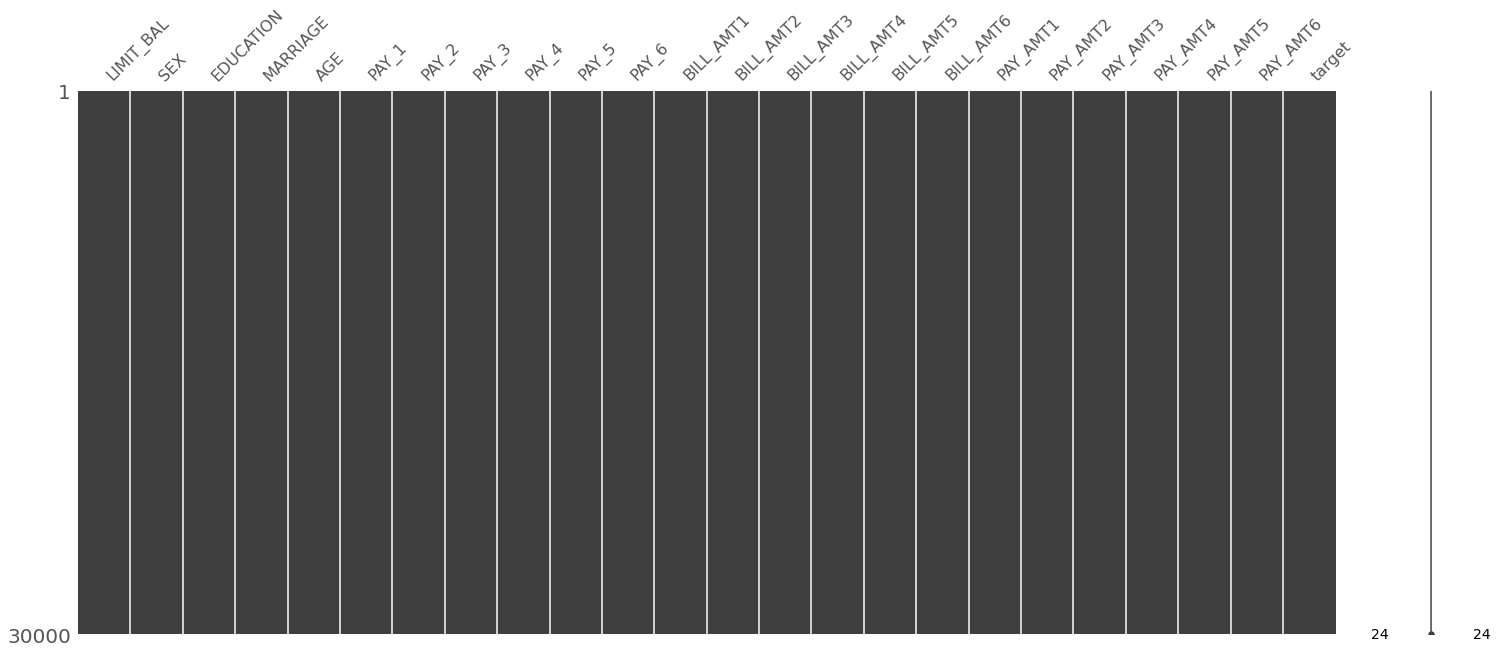

In [21]:
msno.matrix(df);

>Next we can look at the number and percentage of missing values in each column.

In [22]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [23]:
missing_values_table(df)

Your selected dataframe has 24 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### <font color=#BA4A00>Examine Duplicated values </font>

In [24]:
# checking duplicated data
df.duplicated().value_counts()

False    29965
True        35
dtype: int64

In [25]:
df =df.drop_duplicates()

In [26]:
df.shape

(29965, 24)

## <a id="3"><font color=##229954> Exploratory Data Analysis</font></a>

#### <font color=darkblue>First of all, we will check the distribution of the target variable (Default). Then, we'll move on to the our features, looking at their distributions, their relationships to the target, and, in some cases, the relationships among some of them</font>

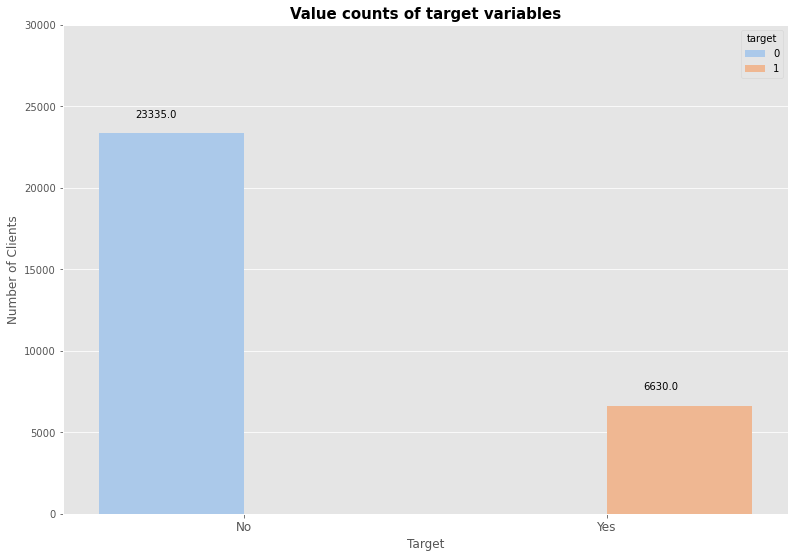

In [27]:
# Fix figsize params
plt.figure(figsize=(13,9))

# Plot values count of the target variable
ax = sns.countplot(x="target", # Variable to apply value count
                   data=df, # Data
                   hue='target', # Legend of the graph
                   palette="pastel" # Colors for the countplot
                  )

# Title axe label etc...
plt.xlabel("Target", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,30000)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 12)
plt.title('Value counts of target variables', fontsize=15, weight='bold')

# Annotate the bar plots with it's values
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+1000))
    
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Default Credit Card Clients - target value (Payed = 0, Unpayed = 1)')

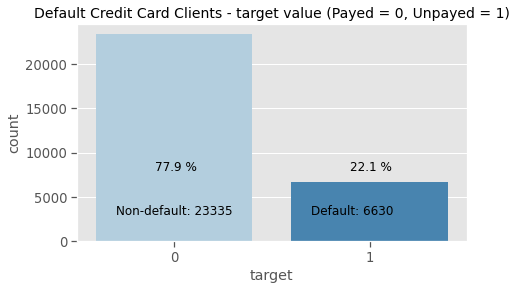

In [28]:
yes = df['target'].sum()
no = len(df)-yes

# Percentage
yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)
 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('target',data=df, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('Default Credit Card Clients - target value (Payed = 0, Unpayed = 1)', size=14)

## <font color=maganta>Demographic Features</font></a>

### <font color=#E59866>Sex</font></a>

#### <font color=darkblue>Number of observations for every unique value in Sex which is in our case 1 for Male and 2 for Female</font>

In [29]:
# X2: Gender (1 = male; 2 = female)
df['SEX'].value_counts()

2    18091
1    11874
Name: SEX, dtype: int64

#### <font color=darkblue>Plot of the observations for every unique value in Sex </font>

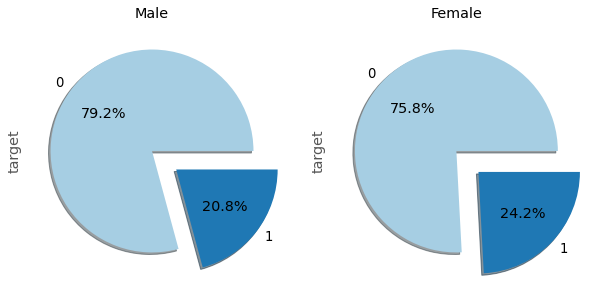

In [30]:
#  Gender (1 = male; 2 = female)
sns.set_palette("Paired")
f, ax = plt.subplots(1,2,figsize=(10,10))
gender=df['SEX'].unique()
list=['Male','Female']
i=0
for g in gender :
    data = df[df['SEX']==g]
    data = data['target'].value_counts()/data.shape[0]*100
    data.plot.pie(shadow = True, autopct="%.1f%%",explode=(0,0.3), ax=ax[i])   
    ax[i].set_title(list[i])
    i+=1


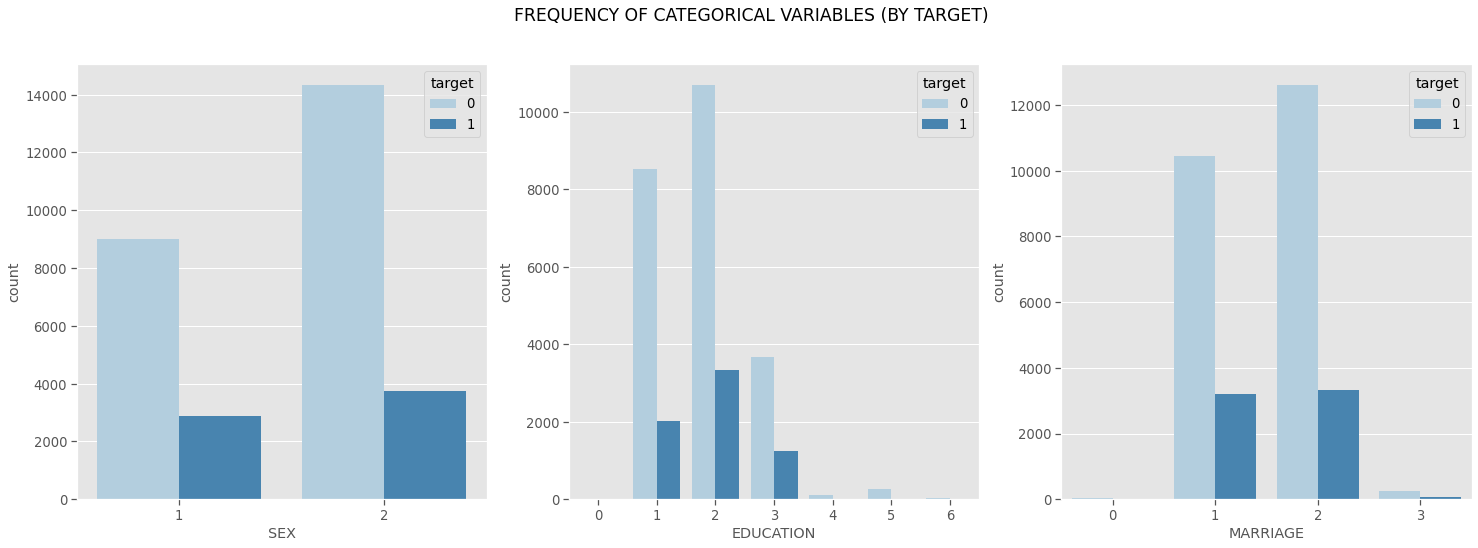

In [31]:
f, axis = plt.subplots(1, 3, figsize=(25, 8), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="target", data=df, palette="Blues", ax=axis[0])
ax2 = sns.countplot(x="EDUCATION", hue="target", data=df, palette="Blues",ax=axis[1])
ax3 = sns.countplot(x="MARRIAGE", hue="target", data=df, palette="Blues",ax=axis[2])

<Figure size 936x648 with 0 Axes>

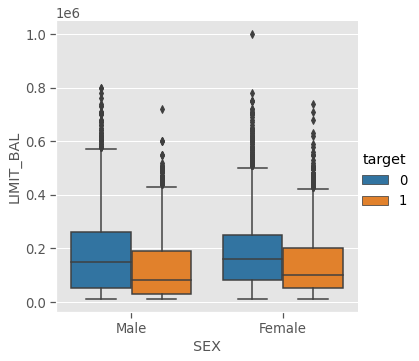

In [32]:
sns.set_palette("tab10")
positions = (0, 1)
plt.figure(figsize=(13,9))

labels = ("Male", "Female")
sns.catplot(x='SEX' , y='LIMIT_BAL' , hue='target' , kind='box' , data = df) 
plt.xticks(positions,labels);

In [33]:

def boxplot_variation(var1, var2, var3, width):
    fig, ax = plt.subplots(ncols=1, figsize=(width,5))
    a = sns.boxplot(ax = ax, x=var1, y=var2, hue=var3,
                data=df, palette="PRGn",showfliers=False)
    a.set_xticklabels(a.get_xticklabels(),rotation=90)
    plt.show();

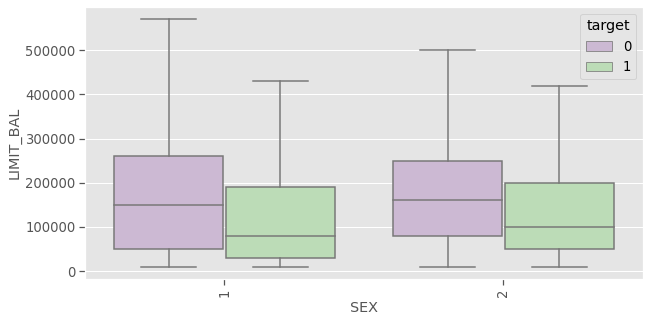

In [34]:
boxplot_variation('SEX','LIMIT_BAL', 'target',10)

As shown by the plots above, we can conclude that:                                     
                 Compared to Females, Males are more reliable coming to paying back

### <font color=#E59866>Education</font></a>

In [35]:
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others)
df['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

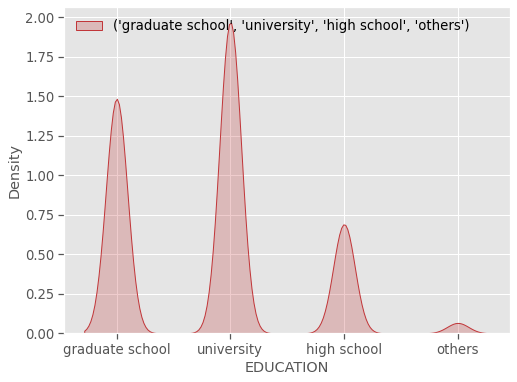

In [36]:
# Fix figsize params
plt.figure(figsize=(8,6))

sns.set_palette("RdBu")
def rep(Edu):
    if Edu in [0,4,5,6]:
        return 4
    else:
        return Edu  

df['EDUCATION'] = df['EDUCATION'].apply(rep)     
positions = (1,2,3,4)
labels = ("graduate school", "university" , 'high school','others')

sns.kdeplot(df['EDUCATION'],label = labels, shade = True)
plt.xticks(positions,labels)
plt.legend(loc='upper left', frameon=False)

plt.show()

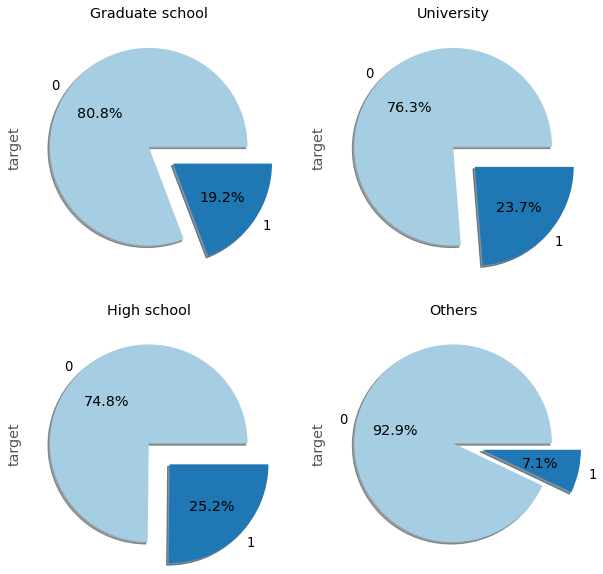

In [37]:
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others)
sns.set_palette("Paired")
f, ax = plt.subplots(2,2,figsize=(10,10))
Edu=[1,2,3,4]
list = ['Graduate school','University','High school','Others']
i=0
j=0
for e in Edu :
    data = df[df['EDUCATION']==e]
    data = data['target'].value_counts()/data.shape[0]*100
    data.plot.pie(shadow = True, autopct="%.1f%%",explode=(0,0.3), ax=ax[i][j])   
    #data.plot.pie ()
    ax[i][j].set_title(list[e-1])
    j+=1
    if j%2 == 0:
        i+=1
        j=0

<Figure size 1152x1080 with 0 Axes>

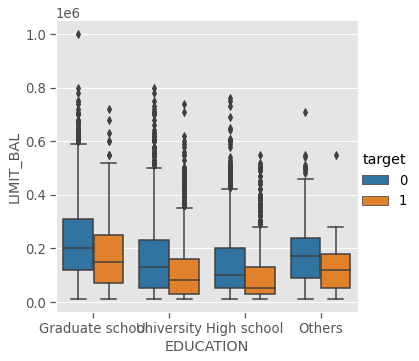

In [38]:
sns.set_palette("tab10")
plt.figure(figsize=(16,15))

positions = (0,1,2,3)
labels = ("Graduate school", "University" , 'High school','Others')
sns.catplot(x='EDUCATION' , y='LIMIT_BAL' , hue='target' , kind='box' , data = df) 
plt.xticks(positions,labels);

As shown by the plots above, we can conclude that:                                     
"Others" are the most reliable but has a higher tendency to borrow large amount of money 

"High school" are the most unreliable and has less tendency to borrow much money 

"Graduate and university" are the the main problem because they are large in number and got a higher tendency (graduate) , not paying back(university)

### <font color=#E59866>Marital Status</font></a>

In [39]:
# X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
df['MARRIAGE'].value_counts()

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

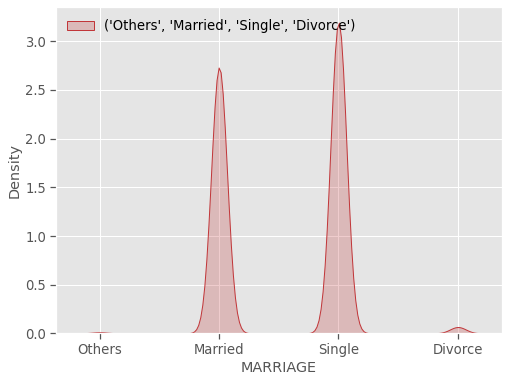

In [40]:
# Fix figsize params
plt.figure(figsize=(8,6))

sns.set_palette("RdBu")
positions = (0, 1 , 2 , 3)
labels = ('Others','Married', 'Single', 'Divorce')
sns.kdeplot(df['MARRIAGE'],label = labels, shade = True)
plt.xticks(positions,labels)
plt.legend(loc='upper left', frameon=False)
plt.show()

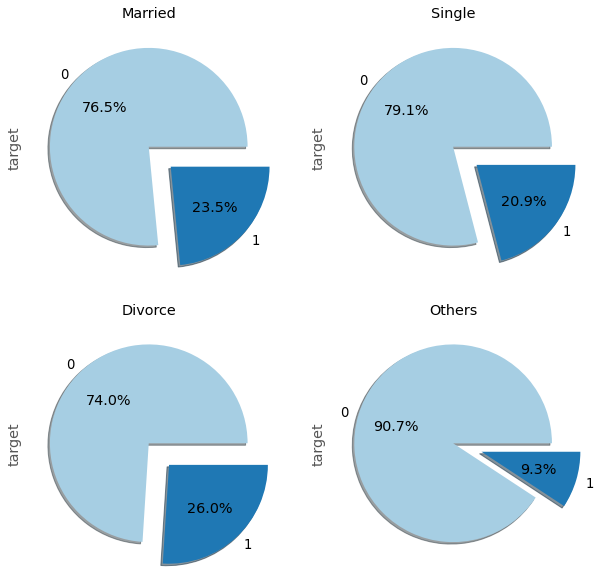

In [41]:
# X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
sns.set_palette("Paired")
f, ax = plt.subplots(2,2,figsize=(10,10))
m_status=df['MARRIAGE'].unique()
list=['Married','Single','Divorce', 'Others']
i=0
j=0
for m in m_status :
    data = df[df['MARRIAGE']==m]
    data = data['target'].value_counts()/data.shape[0]*100
    data.plot.pie(shadow = True, autopct="%.1f%%",explode=(0,0.3), ax=ax[i][j])
    ax[i][j].set_title(list[m-1])
    j+=1
    if j%2 == 0:
        i+=1
        j=0

As shown by the plots above, we can conclude that:                                  
"married" got a high risk of not paying back in the three graphs which represents a problem

"single" represents a problem (not paying,large number)

"divorce and others" dosen't represent a serious problem

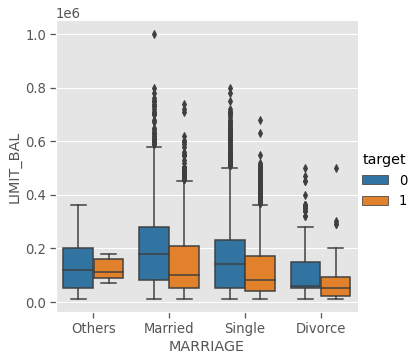

In [42]:
sns.set_palette("tab10")
positions = (0,1,2,3)
labels = ('Others','Married','Single','Divorce')
sns.catplot(x='MARRIAGE' , y='LIMIT_BAL' , hue='target' , kind='box' , data = df) 
plt.xticks(positions,labels);

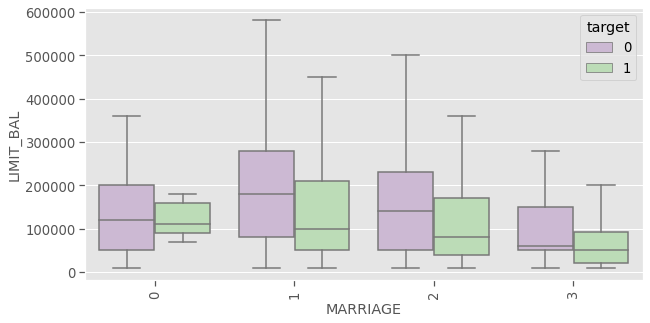

In [43]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'target',10)

### <font color=#E59866>Age</font></a>

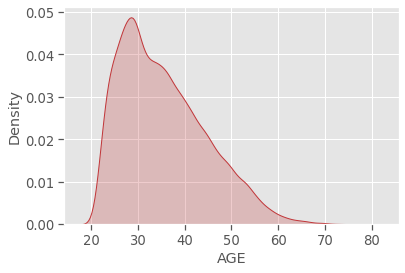

In [44]:
sns.set_palette("RdBu")
sns.kdeplot(df['AGE'], shade = True);

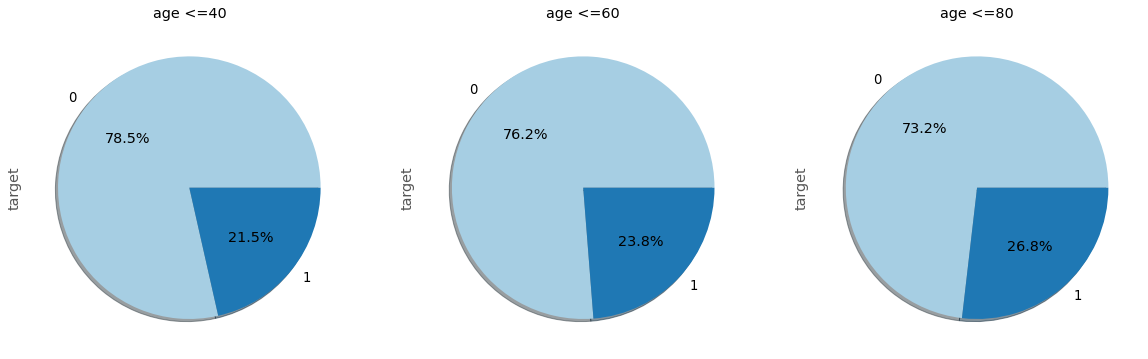

In [45]:
sns.set_palette("Paired")
credit1 = df.copy()
def category(age):
    if age <= 40:
        return 'age <=40'
    elif age <= 60:
        return 'age <=60'
    elif age <= 80:
        return 'age <=80'
credit1['AGE'] = credit1['AGE'].apply(category)

f, ax = plt.subplots(1,3,figsize=(20,20))
age=credit1['AGE'].unique()
i=0
for a in age :
    data = credit1[credit1['AGE']== a]
    data = data['target'].value_counts()/data.shape[0]*100
    data.plot.pie(shadow = True, autopct="%.1f%%", ax=ax[i])

    ax[i].set_title(a)
    i+=1


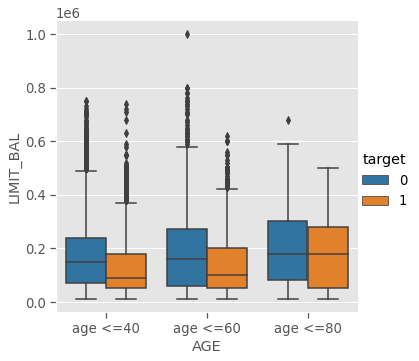

In [46]:
sns.set_palette("tab10")
sns.catplot(x='AGE' , y='LIMIT_BAL' , hue='target' , kind='box' , data = credit1) 


As shown by the plots above, we can conclude that:                                   

Most of the paying problems are for those with age between 20 and 40

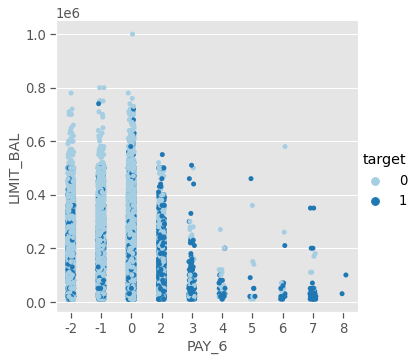

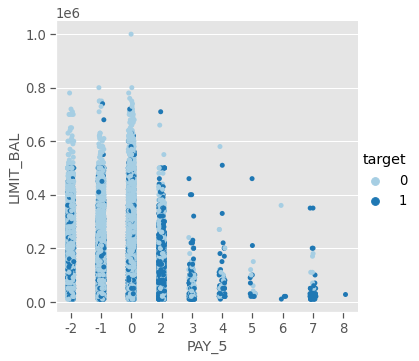

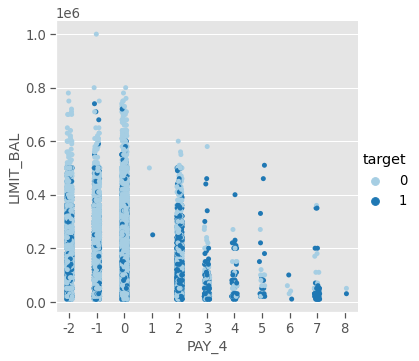

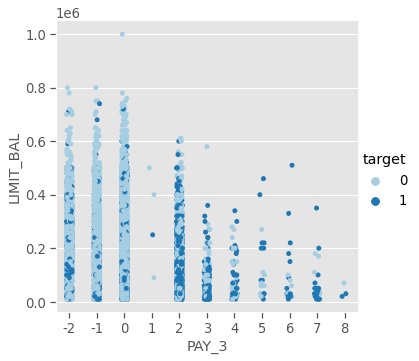

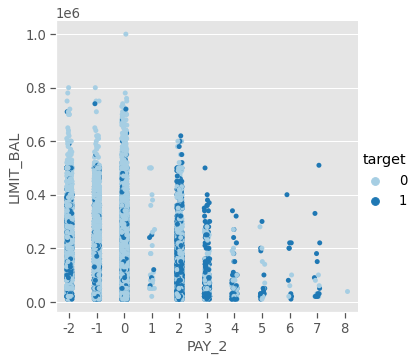

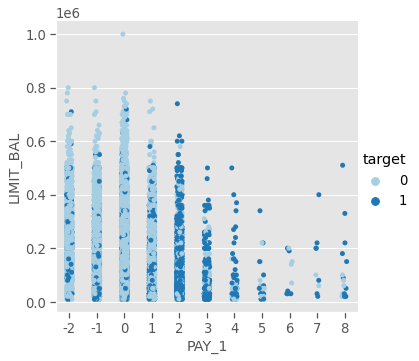

In [47]:
sns.set_palette("Paired")
for pay in ['PAY_6' , 'PAY_5', 'PAY_4','PAY_3', 'PAY_2', 'PAY_1']:
    sns.catplot(x= pay,y='LIMIT_BAL' , hue='target' , data = df)
    


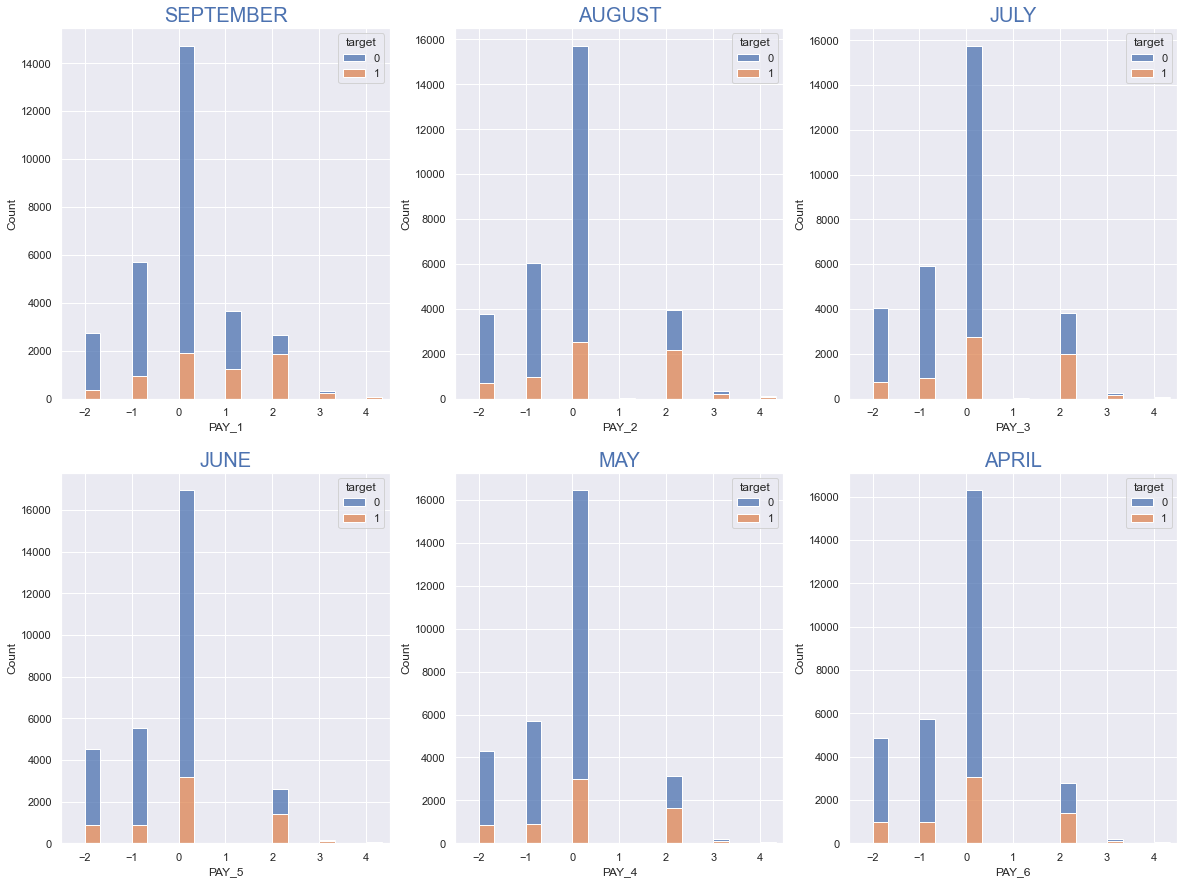

In [48]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 3, figsize=(20, 15))

for (m,n), subplot in np.ndenumerate(axs):
    subplot.set_xlim(-2.5,4.5)
    
sns.histplot(data=pay, x=df['PAY_1'],bins=30, ax=axs[0, 0],hue=df['target'],multiple='stack')
sns.histplot(data=pay, x=df['PAY_2'],bins=30, ax=axs[0, 1],hue=df['target'],multiple='stack')
sns.histplot(data=pay, x=df['PAY_3'],bins=30, ax=axs[0, 2],hue=df['target'],multiple='stack')
sns.histplot(data=pay, x=df['PAY_4'],bins=30, ax=axs[1, 1],hue=df['target'],multiple='stack')
sns.histplot(data=pay, x=df['PAY_5'],bins=30, ax=axs[1, 0],hue=df['target'],multiple='stack')
sns.histplot(data=pay, x=df['PAY_6'],bins=30, ax=axs[1, 2],hue=df['target'],multiple='stack')

axs[0, 0].set_title("SEPTEMBER", fontsize=20, color='b')
axs[0, 1].set_title("AUGUST", fontsize=20, color='b')
axs[0, 2].set_title("JULY", fontsize=20, color='b')
axs[1, 0].set_title("JUNE", fontsize=20, color='b')
axs[1, 1].set_title("MAY", fontsize=20, color='b')
axs[1, 2].set_title("APRIL", fontsize=20, color='b')

plt.show()


As shown by the plots above, we can conclude that: 
if someone who borrowed money, didn't pay back for more than one month, then probably they will not pay at all

we notice that a one month delay is increasing when there is more time to pay 

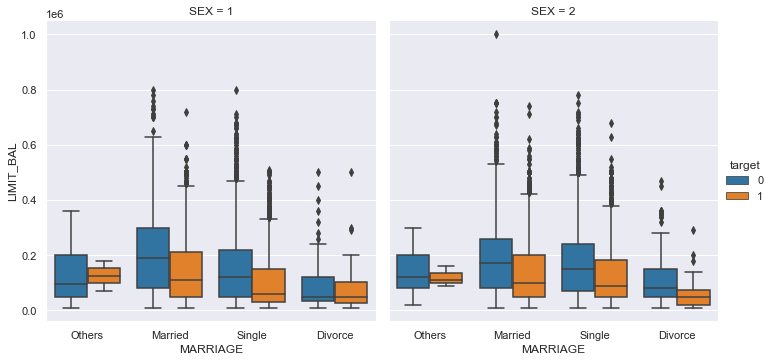

In [49]:
#X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others)
sns.set_palette("tab10")
positions = (0,1,2,3)
labels = ('Others','Married','Single','Divorce')
sns.catplot( x='MARRIAGE',y='LIMIT_BAL', hue='target', data = df,col='SEX', kind='box');
plt.xticks(positions,labels); 

As shown by the plots above, we can conclude that:                                  
"male" and "divorce" are more likely to borrow

### <font color=#E59866>Outliers Detection</font></a>

In [50]:
labeled = df.copy()
labeled['MARRIAGE'] = labeled['MARRIAGE'].replace([0,1,2,3],['others','married','single','divorce'])
labeled['EDUCATION'] = labeled['EDUCATION'].replace([1,2,3,4],['graduate school', 'university' , 'high school','others'])
labeled['SEX'] = labeled['SEX'].replace([1,2],["Male", "Female"])

The most ten categories who borrowed much money

<AxesSubplot:xlabel='SEX,MARRIAGE,EDUCATION'>

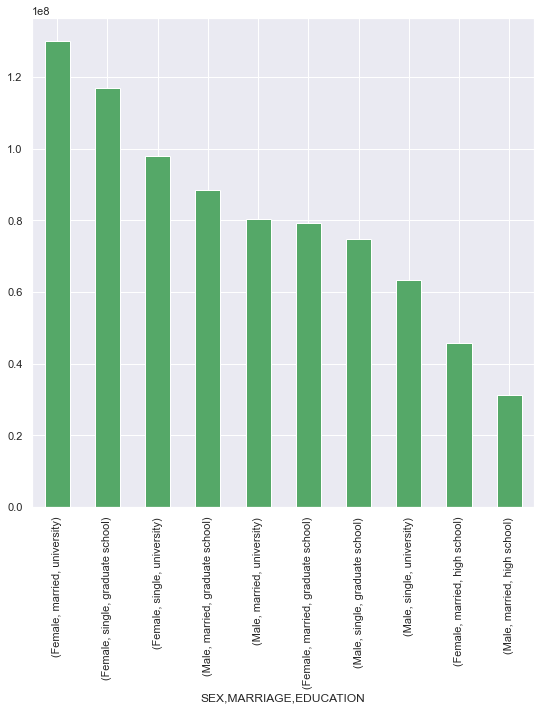

In [51]:
labeled[labeled['target']==1].groupby(['SEX','MARRIAGE','EDUCATION'])['LIMIT_BAL'].sum().sort_values(ascending=False)[0:10].plot(kind = "bar",figsize=(9,9),color='g')


As shown by the plots above, we can conclude that:                          
the worst category was (female,married,university)

most of the top borrowing were females and most of the top borrowing were university or graduate schools

The target 0 or 1 for each category

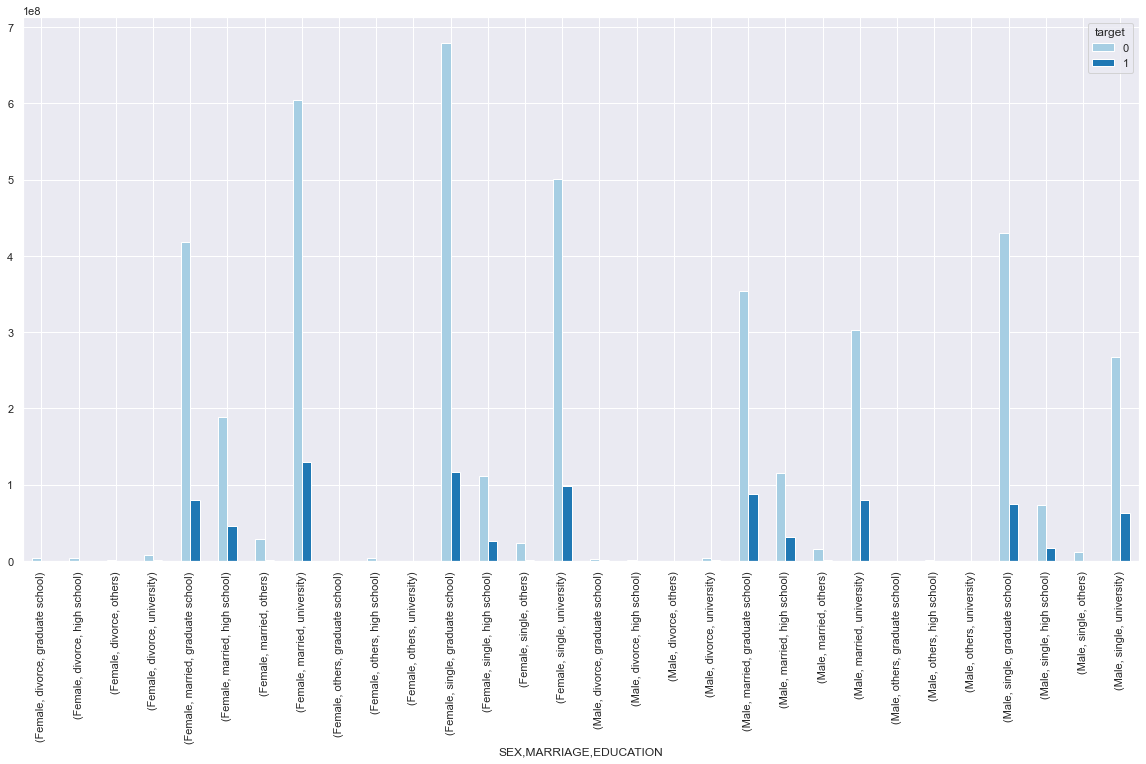

In [52]:
sns.set_palette('Paired')
labeled.groupby(['SEX','MARRIAGE','EDUCATION','target'])['LIMIT_BAL'].sum().sort_values(ascending=False).unstack().plot(kind = "bar" , figsize=(20,10));

<AxesSubplot:xlabel='SEX,MARRIAGE,EDUCATION'>

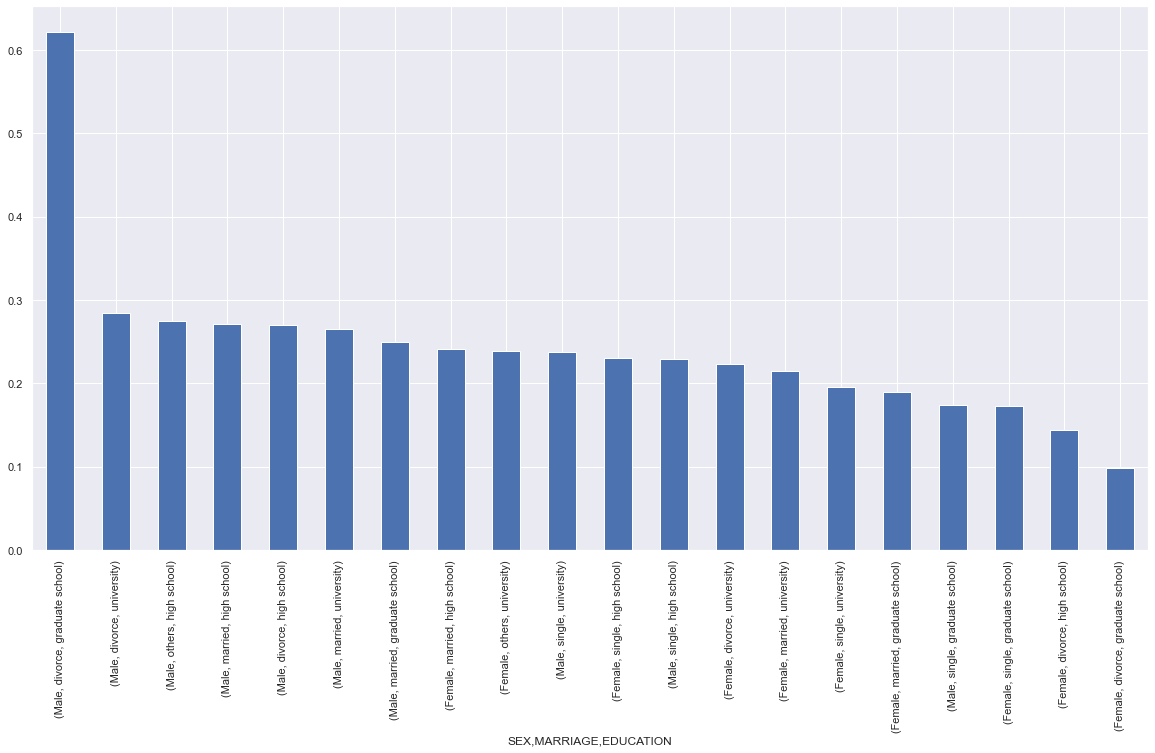

In [53]:
sns.set_palette("tab10")
ratio = labeled.groupby(['SEX','MARRIAGE','EDUCATION','target'])['LIMIT_BAL'].sum().sort_values(ascending=False).unstack()
ratio = ratio.replace(np.NaN,0)
ratio['ratio_target']=ratio[1]/ratio[0]
ratio['ratio_target'].sort_values(ascending=False)[0:20].plot(kind='bar' , figsize=(20,10) , y = 1,color='b')

<AxesSubplot:xlabel='SEX,MARRIAGE,EDUCATION'>

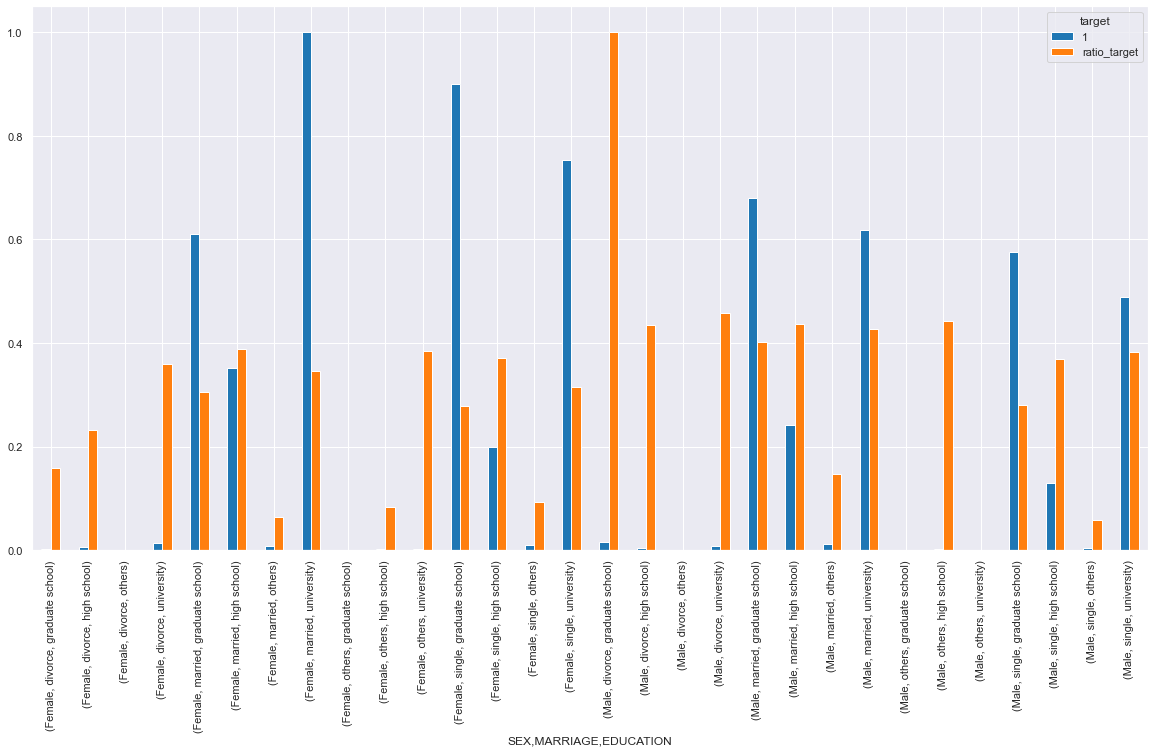

In [54]:
ratio['ratio_target'] = (ratio['ratio_target']-ratio['ratio_target'].min())/(ratio['ratio_target'].max()-ratio['ratio_target'].min())
ratio[1] = (ratio[1]-ratio[1].min())/(ratio[1].max()-ratio[1].min())
ratio.plot(kind='bar' , figsize=(20,10) , y = [1,'ratio_target'])

<AxesSubplot:xlabel='SEX,MARRIAGE,EDUCATION'>

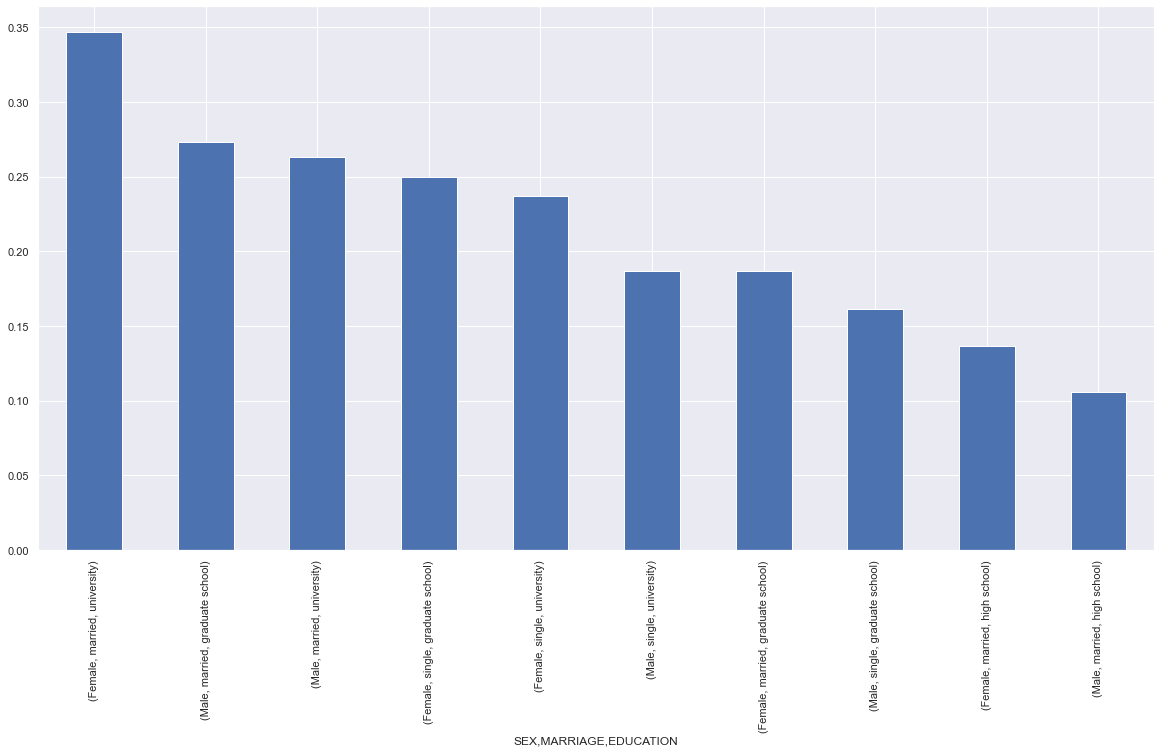

In [55]:
ratio['ratio']=ratio['ratio_target']*ratio[1]
ratio['ratio'].sort_values(ascending=False)[0:10].plot(kind='bar' , figsize=(20,10),color='b')

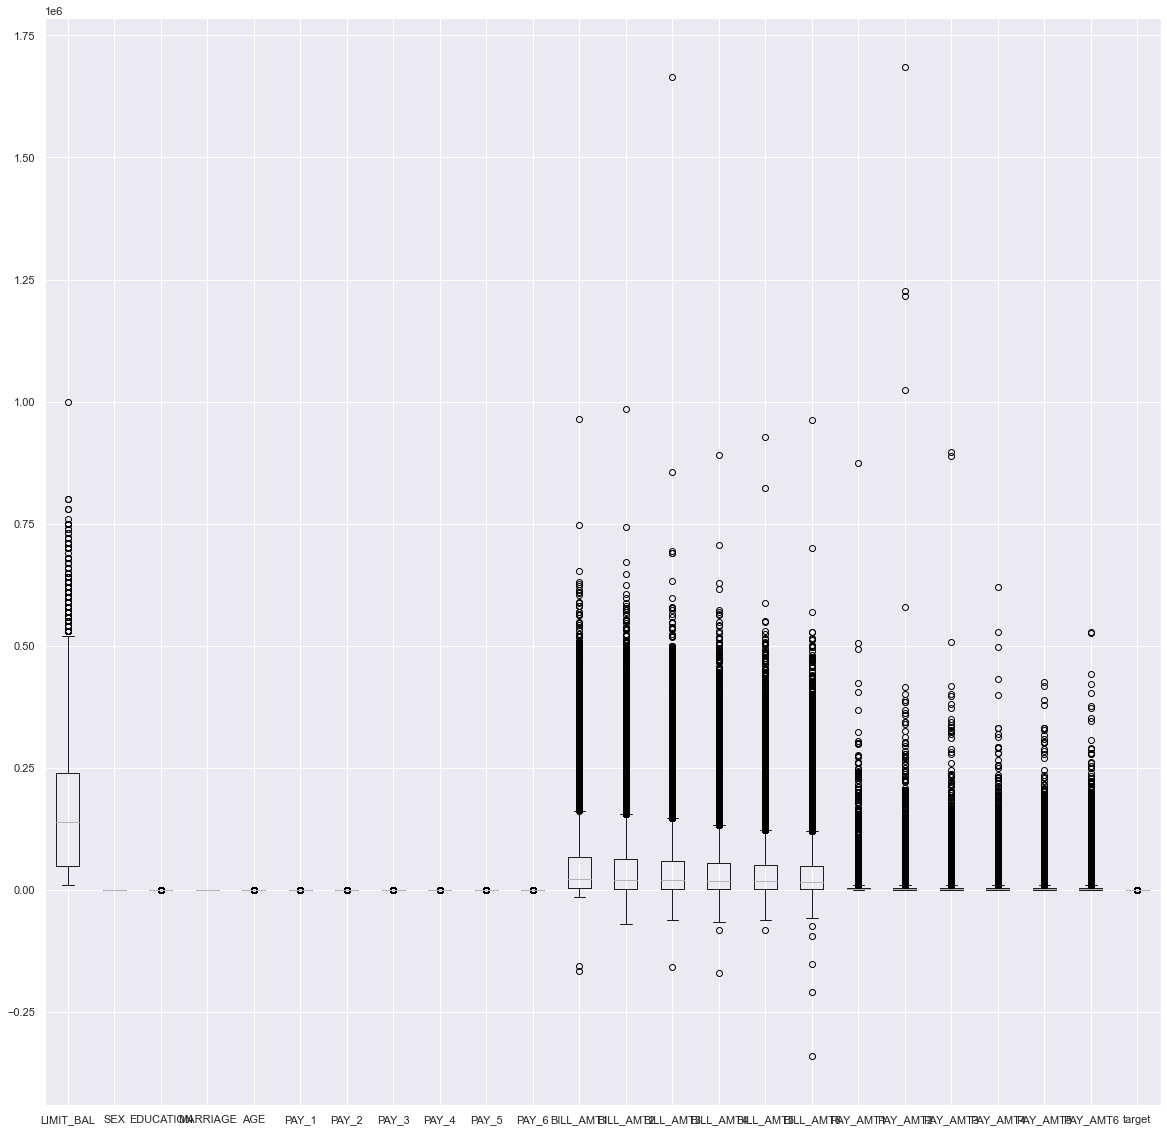

In [56]:
plt.figure(figsize=(20,20))
df.boxplot();

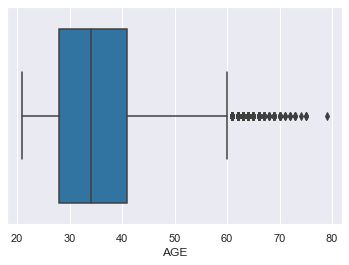

In [57]:
sns.boxplot(x='AGE',data=df);

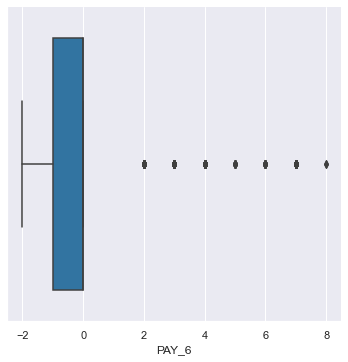

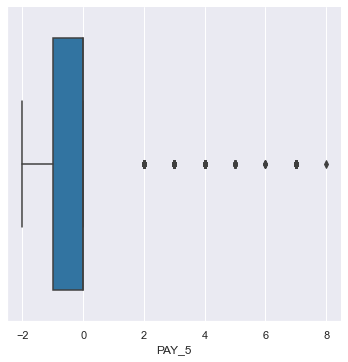

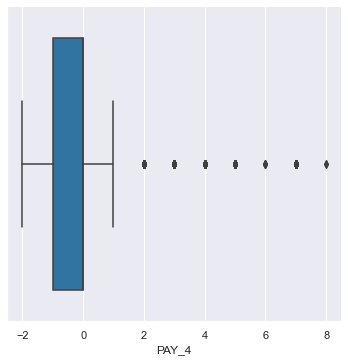

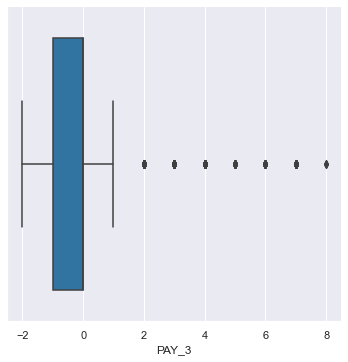

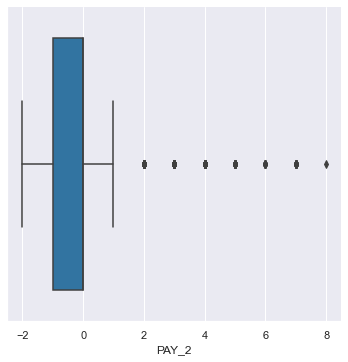

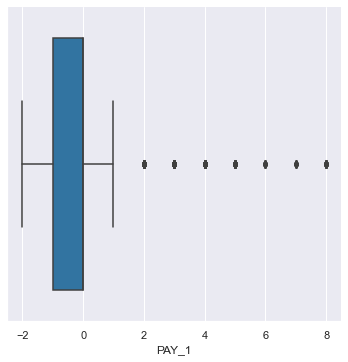

In [58]:
for pay in ['PAY_6' , 'PAY_5', 'PAY_4','PAY_3', 'PAY_2', 'PAY_1']:
    sns.catplot(x= pay , kind='box' ,data = df)

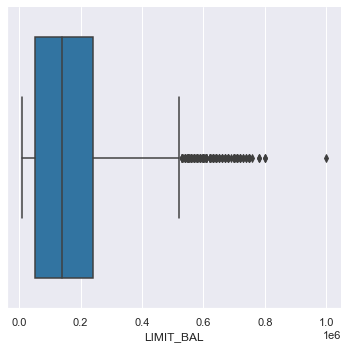

In [59]:
#sns.boxplot(x='LIMIT_BALL',data=credit)
sns.catplot(x= 'LIMIT_BAL' , kind='box' ,data = df);

In [60]:
df_b = pd.DataFrame({'MONTHS': pd.Series(['SEPTEMBER','AUGUST', 'JULY','JUNE','MAY', 'APRIL']), 'VALUE': pd.Series([np.sum(df['BILL_AMT1']), np.sum(df['BILL_AMT2']), np.sum(df['BILL_AMT3']),np.sum(df['BILL_AMT4']),np.sum(df['BILL_AMT5']), np.sum(df['BILL_AMT6'])])})
df_b

,MONTHS,VALUE
0,SEPTEMBER,1536695388
1,AUGUST,1475367716
2,JULY,1410390105
3,JUNE,1297883930
4,MAY,1209337490
5,APRIL,1166148273


In [61]:
df_p = pd.DataFrame({'MONTHS': pd.Series(['SEPTEMBER','AUGUST', 'JULY','JUNE','MAY', 'APRIL']), 'VALUE': pd.Series([np.sum(df['PAY_AMT1']), np.sum(df['PAY_AMT2']), np.sum(df['PAY_AMT3']),np.sum(df['PAY_AMT4']),np.sum(df['PAY_AMT5']), np.sum(df['PAY_AMT6'])])})
df_p

,MONTHS,VALUE
0,SEPTEMBER,169904526
1,AUGUST,177632016
2,JULY,156767556
3,JUNE,144779417
4,MAY,143978740
5,APRIL,156462188


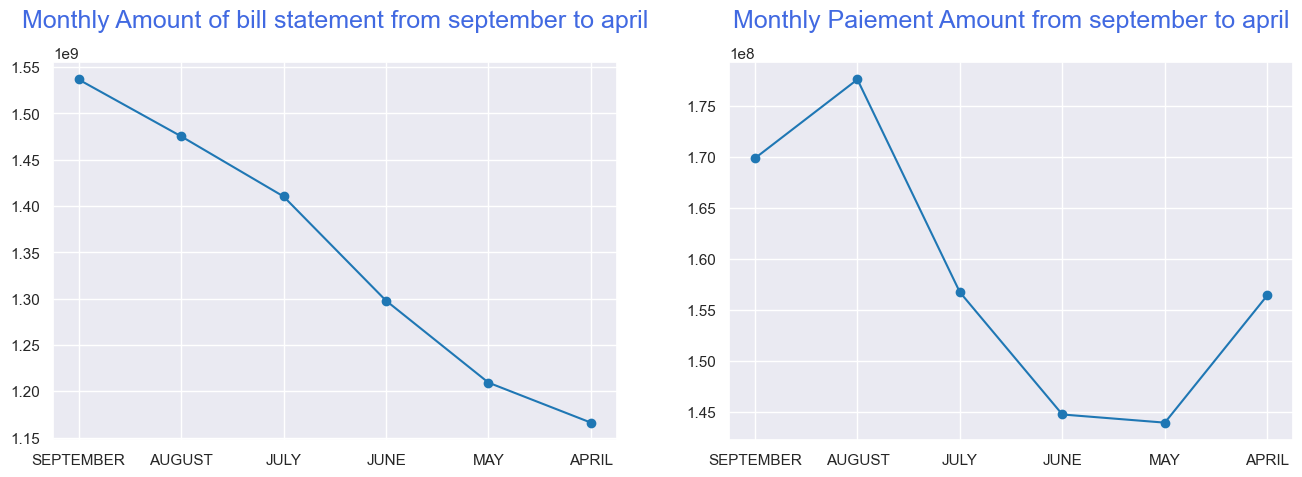

In [62]:
plt.figure(figsize=(16,5), dpi=100)

plt.subplot(121)
plt.plot(df_b.MONTHS, df_b.VALUE,marker = 'o')
plt.title('Monthly Amount of bill statement from september to april\n', c='royalblue', fontsize=18)

plt.subplot(122)
plt.plot(df_p.MONTHS, df_p.VALUE, marker = 'o')
plt.title('Monthly Paiement Amount from september to april\n', c='royalblue', fontsize=18)


plt.show()

We can notice from this Time September is the month that most people take credits in.
however we have two senarios:
1. either they pay back in the next month
2.the dept will be devided on the next 6

In [64]:
raw_data = {'MONTHS': ['SEPTEMBER', 'AUGUST', 'JULY', 'JUNE', 'MAY','APRIL'],
'female': [labeled.loc[labeled['SEX'] == 'Female', 'BILL_AMT1'].sum(), labeled.loc[labeled['SEX'] == 'Female', 'BILL_AMT2'].sum(), labeled.loc[labeled['SEX'] == 'Female', 'BILL_AMT3'].sum(), labeled.loc[labeled['SEX'] == 'Female', 'BILL_AMT4'].sum(), labeled.loc[labeled['SEX'] == 'Female', 'BILL_AMT5'].sum(),labeled.loc[labeled['SEX'] == 'Female', 'BILL_AMT6'].sum()],
'male': [labeled.loc[labeled['SEX'] == 'Male', 'BILL_AMT1'].sum(), labeled.loc[labeled['SEX'] == 'Male', 'BILL_AMT2'].sum(), labeled.loc[labeled['SEX'] == 'Male', 'BILL_AMT3'].sum(), labeled.loc[labeled['SEX'] == 'Male', 'BILL_AMT4'].sum(), labeled.loc[labeled['SEX'] == 'Male', 'BILL_AMT5'].sum(),labeled.loc[labeled['SEX'] == 'Male', 'BILL_AMT6'].sum()]}
dff1 = pd.DataFrame(raw_data, columns = ['MONTHS', 'female','male'])
dff1

,MONTHS,female,male
0,SEPTEMBER,891406961,645288427
1,AUGUST,858164241,617203475
2,JULY,826506480,583883625
3,JUNE,762924143,534959787
4,MAY,714949380,494388110
5,APRIL,689422517,476725756


In [65]:
raw_data = {'MONTHS': ['SEPTEMBER', 'AUGUST', 'JULY', 'JUNE', 'MAY','APRIL'],
'graduate school': [labeled.loc[labeled['EDUCATION'] == 'graduate school', 'BILL_AMT1'].sum(), labeled.loc[labeled['EDUCATION'] == 'graduate school', 'BILL_AMT2'].sum(), labeled.loc[labeled['EDUCATION'] == 'graduate school', 'BILL_AMT3'].sum(), labeled.loc[labeled['EDUCATION'] == 'graduate school', 'BILL_AMT4'].sum(), labeled.loc[labeled['EDUCATION'] == 'graduate school', 'BILL_AMT5'].sum(),labeled.loc[labeled['EDUCATION'] == 'graduate school', 'BILL_AMT6'].sum()],
'university': [labeled.loc[labeled['EDUCATION'] == 'university', 'BILL_AMT1'].sum(), labeled.loc[labeled['EDUCATION'] == 'university', 'BILL_AMT2'].sum(), labeled.loc[labeled['EDUCATION'] == 'university', 'BILL_AMT3'].sum(), labeled.loc[labeled['EDUCATION'] == 'university', 'BILL_AMT4'].sum(), labeled.loc[labeled['EDUCATION'] == 'university', 'BILL_AMT5'].sum(),labeled.loc[labeled['EDUCATION'] == 'university', 'BILL_AMT6'].sum()],
'high school':[labeled.loc[labeled['EDUCATION'] == 'high school', 'BILL_AMT1'].sum(), labeled.loc[labeled['EDUCATION'] == 'high school', 'BILL_AMT2'].sum(), labeled.loc[labeled['EDUCATION'] == 'high school', 'BILL_AMT3'].sum(), labeled.loc[labeled['EDUCATION'] == 'high school', 'BILL_AMT4'].sum(), labeled.loc[labeled['EDUCATION'] == 'high school', 'BILL_AMT5'].sum(),labeled.loc[labeled['EDUCATION'] == 'high school', 'BILL_AMT6'].sum()],
'others': [labeled.loc[labeled['EDUCATION'] == 'others','BILL_AMT1'].sum(), labeled.loc[labeled['EDUCATION'] == 'others', 'BILL_AMT2'].sum(), labeled.loc[labeled['EDUCATION'] == 'others', 'BILL_AMT3'].sum(), labeled.loc[labeled['EDUCATION'] == 'others', 'BILL_AMT4'].sum(), labeled.loc[labeled['EDUCATION'] == 'others', 'BILL_AMT5'].sum(),labeled.loc[labeled['EDUCATION'] == 'others', 'BILL_AMT6'].sum()]}
dff_edu = pd.DataFrame(raw_data, columns = ['MONTHS', 'graduate school','university','high school','others'])
dff_edu

,MONTHS,graduate school,university,high school,others
0,SEPTEMBER,516816596,752082153,233869566,33927073
1,AUGUST,499813526,720571859,223822924,31159407
2,JULY,484598520,682726638,213598597,29466350
3,JUNE,454424665,627821891,190378879,25258495
4,MAY,427515754,583484096,176802487,21535153
5,APRIL,409300925,567256683,170642115,18948550


In [66]:
raw_data = {'MONTHS': ['SEPTEMBER', 'AUGUST', 'JULY', 'JUNE', 'MAY','APRIL'],
'married': [labeled.loc[labeled['MARRIAGE'] == 'married', 'BILL_AMT1'].sum(), labeled.loc[labeled['MARRIAGE'] == 'married', 'BILL_AMT2'].sum(), labeled.loc[labeled['MARRIAGE'] == 'married', 'BILL_AMT3'].sum(), labeled.loc[labeled['MARRIAGE'] == 'married', 'BILL_AMT4'].sum(), labeled.loc[labeled['MARRIAGE'] == 'married', 'BILL_AMT5'].sum(),labeled.loc[labeled['MARRIAGE'] == 'married', 'BILL_AMT6'].sum()],
'single':[labeled.loc[labeled['MARRIAGE'] == 'single', 'BILL_AMT1'].sum(), labeled.loc[labeled['MARRIAGE'] == 'single', 'BILL_AMT2'].sum(), labeled.loc[labeled['MARRIAGE'] == 'single', 'BILL_AMT3'].sum(), labeled.loc[labeled['MARRIAGE'] == 'single', 'BILL_AMT4'].sum(), labeled.loc[labeled['MARRIAGE'] == 'single', 'BILL_AMT5'].sum(),labeled.loc[labeled['MARRIAGE'] == 'single', 'BILL_AMT6'].sum()],
'divorce': [labeled.loc[labeled['MARRIAGE'] == 'divorce','BILL_AMT1'].sum(), labeled.loc[labeled['MARRIAGE'] == 'divorce', 'BILL_AMT2'].sum(), labeled.loc[labeled['MARRIAGE'] == 'divorce', 'BILL_AMT3'].sum(), labeled.loc[labeled['MARRIAGE'] == 'divorce', 'BILL_AMT4'].sum(), labeled.loc[labeled['MARRIAGE'] == 'divorce', 'BILL_AMT5'].sum(),labeled.loc[labeled['MARRIAGE'] == 'divorce', 'BILL_AMT6'].sum()]}
dff_merr = pd.DataFrame(raw_data, columns = ['MONTHS', 'married','single','divorce'])
dff_merr

,MONTHS,married,single,divorce
0,SEPTEMBER,727450286,794197617,13945852
1,AUGUST,695583280,765554583,12935755
2,JULY,669032116,728298652,12019655
3,JUNE,613174858,673595295,10087387
4,MAY,573335690,625913995,9130968
5,APRIL,549781634,606226395,9232211


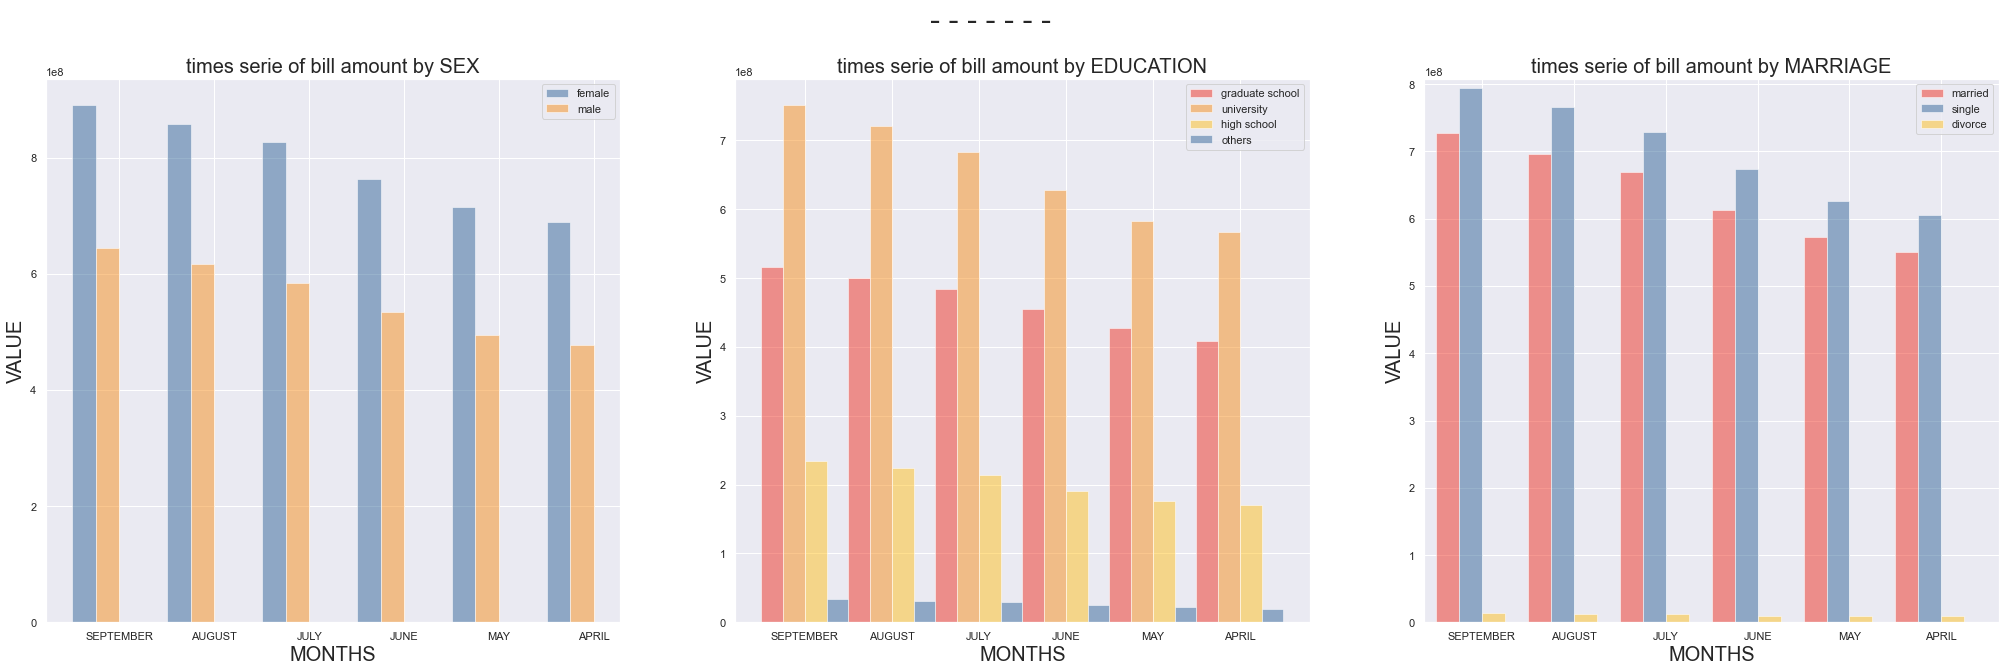

In [67]:

#Tracé des barres
fig , axs= plt.subplots(1,3, figsize=(35,10)) 
fig.suptitle('- - - - - - -', fontsize=30)

#pos = list(range(len(dff1['female'])))
pos = [0,1,2,3,4,5]
width = 0.25
axs[0].bar(pos,dff1['female'],width,alpha=0.5,color=(0.2, 0.4, 0.6, 0.6),label=dff1['MONTHS'][0])
axs[0].bar([p + width for p in pos],dff1['male'],width,alpha=0.5,color='#F78F1E',label=dff1['MONTHS'][1])

ax1=axs[0]
ax1.set_ylabel('VALUE', fontsize=20)
ax1.set_xlabel('MONTHS', fontsize=20)
ax1.set_title('times serie of bill amount by SEX', fontsize=20)
# position des ticks (position des groupes)
ax1.set_xticks([p + 1.5 * width for p in pos])
ax1.set_xticklabels(dff1['MONTHS'])
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(dff1['female'] + dff1['male'])] )
ax1.legend(['female', 'male'], loc='upper right')

#pos = list(range(len(dff_edu['university']))) 
pos = [0,1,2,3,4,5]
width = 0.25
axs[1].bar(pos,dff_edu['graduate school'],width,alpha=0.5,color='#EE3224',label=dff_edu['MONTHS'][0])
axs[1].bar([p + width for p in pos],dff_edu['university'],width,alpha=0.5,color='#F78F1E',label=dff_edu['MONTHS'][1])
axs[1].bar([p + width*2 for p in pos],dff_edu['high school'],width,alpha=0.5,color='#FFC222',label=dff_edu['MONTHS'][2])
axs[1].bar([p + width*3 for p in pos],dff_edu['others'],width,alpha=0.5,color=(0.2, 0.4, 0.6, 0.6),label=dff_edu['MONTHS'][3])

ax2=axs[1]
ax2.set_ylabel('VALUE', fontsize=20)
ax2.set_xlabel('MONTHS', fontsize=20)
ax2.set_title('times serie of bill amount by EDUCATION', fontsize=20)
ax2.set_xticks([p + 1.5 * width for p in pos])
ax2.set_xticklabels(dff_edu['MONTHS'])
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max( dff_edu['university'] + dff_edu['others'] )] )
ax2.legend(['graduate school', 'university','high school', 'others'], loc='upper right')

#pos = list(range(len(dff_merr['divorce']))) 
pos = [0,1,2,3,4,5]
width = 0.25
axs[2].bar(pos,dff_merr['married'],width,alpha=0.5,color='#EE3224',label=dff_merr['MONTHS'][0])
axs[2].bar([p + width for p in pos],dff_merr['single'],width,alpha=0.5,color=(0.2, 0.4, 0.6, 0.6),label=dff_merr['MONTHS'][1])
axs[2].bar([p + width*2 for p in pos],dff_merr['divorce'],width,alpha=0.5,color='#FFC222',label=dff_merr['MONTHS'][2])

ax3=axs[2]
ax3.set_ylabel('VALUE', fontsize=20)
ax3.set_xlabel('MONTHS', fontsize=20)
ax3.set_title('times serie of bill amount by MARRIAGE', fontsize=20)
ax3.set_xticks([p + 1.5 * width for p in pos])
ax3.set_xticklabels(dff_merr['MONTHS'])
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max( dff_merr['divorce'] + dff_merr['single'] )] )
ax3.legend(['married','single', 'divorce'], loc='upper right')
plt.show()


as we said before, september is the month were most people take credits however what we observe from this plot is that:
1. women take more credits than man
2. university studensts take more credits than the others
3. single poeple take more credits as well however devorced poeple amounts is surprisingly low 

In [68]:
raw_data = {'MONTHS': ['SEPTEMBER', 'AUGUST', 'JULY', 'JUNE', 'MAY','APRIL'],
'graduate school': [labeled.loc[labeled['EDUCATION'] == 'graduate school', 'PAY_AMT1'].sum(), labeled.loc[labeled['EDUCATION'] == 'graduate school', 'PAY_AMT2'].sum(), labeled.loc[labeled['EDUCATION'] == 'graduate school', 'PAY_AMT3'].sum(), labeled.loc[labeled['EDUCATION'] == 'graduate school', 'PAY_AMT4'].sum(), labeled.loc[labeled['EDUCATION'] == 'graduate school', 'PAY_AMT5'].sum(),labeled.loc[labeled['EDUCATION'] == 'graduate school', 'PAY_AMT6'].sum()],
'university': [labeled.loc[labeled['EDUCATION'] == 'university', 'PAY_AMT1'].sum(), labeled.loc[labeled['EDUCATION'] == 'university', 'PAY_AMT2'].sum(), labeled.loc[labeled['EDUCATION'] == 'university', 'PAY_AMT3'].sum(), labeled.loc[labeled['EDUCATION'] == 'university', 'PAY_AMT4'].sum(), labeled.loc[labeled['EDUCATION'] == 'university', 'PAY_AMT5'].sum(),labeled.loc[labeled['EDUCATION'] == 'university', 'PAY_AMT6'].sum()],
'high school':[labeled.loc[labeled['EDUCATION'] == 'high school', 'PAY_AMT1'].sum(), labeled.loc[labeled['EDUCATION'] == 'high school', 'PAY_AMT2'].sum(), labeled.loc[labeled['EDUCATION'] == 'high school', 'PAY_AMT3'].sum(), labeled.loc[labeled['EDUCATION'] == 'high school', 'PAY_AMT4'].sum(), labeled.loc[labeled['EDUCATION'] == 'high school', 'PAY_AMT5'].sum(),labeled.loc[labeled['EDUCATION'] == 'high school', 'PAY_AMT6'].sum()],
'others': [labeled.loc[labeled['EDUCATION'] == 'others','PAY_AMT1'].sum(), labeled.loc[labeled['EDUCATION'] == 'others', 'PAY_AMT2'].sum(), labeled.loc[labeled['EDUCATION'] == 'others', 'PAY_AMT3'].sum(), labeled.loc[labeled['EDUCATION'] == 'others', 'PAY_AMT4'].sum(), labeled.loc[labeled['EDUCATION'] == 'others', 'PAY_AMT5'].sum(),labeled.loc[labeled['EDUCATION'] == 'others', 'PAY_AMT6'].sum()]}
dff_edu_pay = pd.DataFrame(raw_data, columns = ['MONTHS', 'graduate school','university','high school','others'])
dff_edu_pay

,MONTHS,graduate school,university,high school,others
0,SEPTEMBER,71775522,71277061,23927686,2924257
1,AUGUST,77339936,71645321,24847444,3799315
2,JULY,69443140,63930065,19490877,3903474
3,JUNE,61440667,61384845,19631512,2322393
4,MAY,61144251,62469243,17699133,2666113
5,APRIL,67982083,66170474,18810818,3498813


In [69]:
raw_data = {'MONTHS': ['SEPTEMBER', 'AUGUST', 'JULY', 'JUNE', 'MAY','APRIL'],
'female': [labeled.loc[labeled['SEX'] == 'Female', 'PAY_AMT1'].sum(), labeled.loc[labeled['SEX'] == 'Female', 'PAY_AMT2'].sum(), labeled.loc[labeled['SEX'] == 'Female', 'PAY_AMT3'].sum(), labeled.loc[labeled['SEX'] == 'Female', 'PAY_AMT4'].sum(), labeled.loc[labeled['SEX'] == 'Female', 'PAY_AMT5'].sum(),labeled.loc[labeled['SEX'] == 'Female', 'PAY_AMT6'].sum()],
'male': [labeled.loc[labeled['SEX'] == 'Male', 'PAY_AMT1'].sum(), labeled.loc[labeled['SEX'] == 'Male', 'PAY_AMT2'].sum(), labeled.loc[labeled['SEX'] == 'Male', 'PAY_AMT3'].sum(), labeled.loc[labeled['SEX'] == 'Male', 'PAY_AMT4'].sum(), labeled.loc[labeled['SEX'] == 'Male', 'PAY_AMT5'].sum(),labeled.loc[labeled['SEX'] == 'Male', 'PAY_AMT6'].sum()]}
dff = pd.DataFrame(raw_data, columns = ['MONTHS', 'female','male'])
dff

,MONTHS,female,male
0,SEPTEMBER,102519454,67385072
1,AUGUST,106773474,70858542
2,JULY,92426183,64341373
3,JUNE,86897128,57882289
4,MAY,86552367,57426373
5,APRIL,93741260,62720928


In [70]:
raw_data = {'MONTHS': ['SEPTEMBER', 'AUGUST', 'JULY', 'JUNE', 'MAY','APRIL'],
'married': [labeled.loc[labeled['MARRIAGE'] == 'married', 'PAY_AMT1'].sum(), labeled.loc[labeled['MARRIAGE'] == 'married', 'PAY_AMT2'].sum(), labeled.loc[labeled['MARRIAGE'] == 'married', 'PAY_AMT3'].sum(), labeled.loc[labeled['MARRIAGE'] == 'married', 'PAY_AMT4'].sum(), labeled.loc[labeled['MARRIAGE'] == 'married', 'PAY_AMT5'].sum(),labeled.loc[labeled['MARRIAGE'] == 'married', 'PAY_AMT6'].sum()],
'single':[labeled.loc[labeled['MARRIAGE'] == 'single', 'PAY_AMT1'].sum(), labeled.loc[labeled['MARRIAGE'] == 'single', 'PAY_AMT2'].sum(), labeled.loc[labeled['MARRIAGE'] == 'single', 'PAY_AMT3'].sum(), labeled.loc[labeled['MARRIAGE'] == 'single', 'PAY_AMT4'].sum(), labeled.loc[labeled['MARRIAGE'] == 'single', 'PAY_AMT5'].sum(),labeled.loc[labeled['MARRIAGE'] == 'single', 'PAY_AMT6'].sum()],
'divorce': [labeled.loc[labeled['MARRIAGE'] == 'divorce','PAY_AMT1'].sum(), labeled.loc[labeled['MARRIAGE'] == 'divorce', 'PAY_AMT2'].sum(), labeled.loc[labeled['MARRIAGE'] == 'divorce', 'PAY_AMT3'].sum(), labeled.loc[labeled['MARRIAGE'] == 'divorce', 'PAY_AMT4'].sum(), labeled.loc[labeled['MARRIAGE'] == 'divorce', 'PAY_AMT5'].sum(),labeled.loc[labeled['MARRIAGE'] == 'divorce', 'PAY_AMT6'].sum()]}
dff_merr_pay = pd.DataFrame(raw_data, columns = ['MONTHS', 'married','single','divorce'])
dff_merr_pay

,MONTHS,married,single,divorce
0,SEPTEMBER,79079581,88171930,2232079
1,AUGUST,84761354,90179998,2540439
2,JULY,72779373,81784196,1986478
3,JUNE,69329526,73641082,1654141
4,MAY,66053388,76336482,1474146
5,APRIL,72822711,82417501,1101103


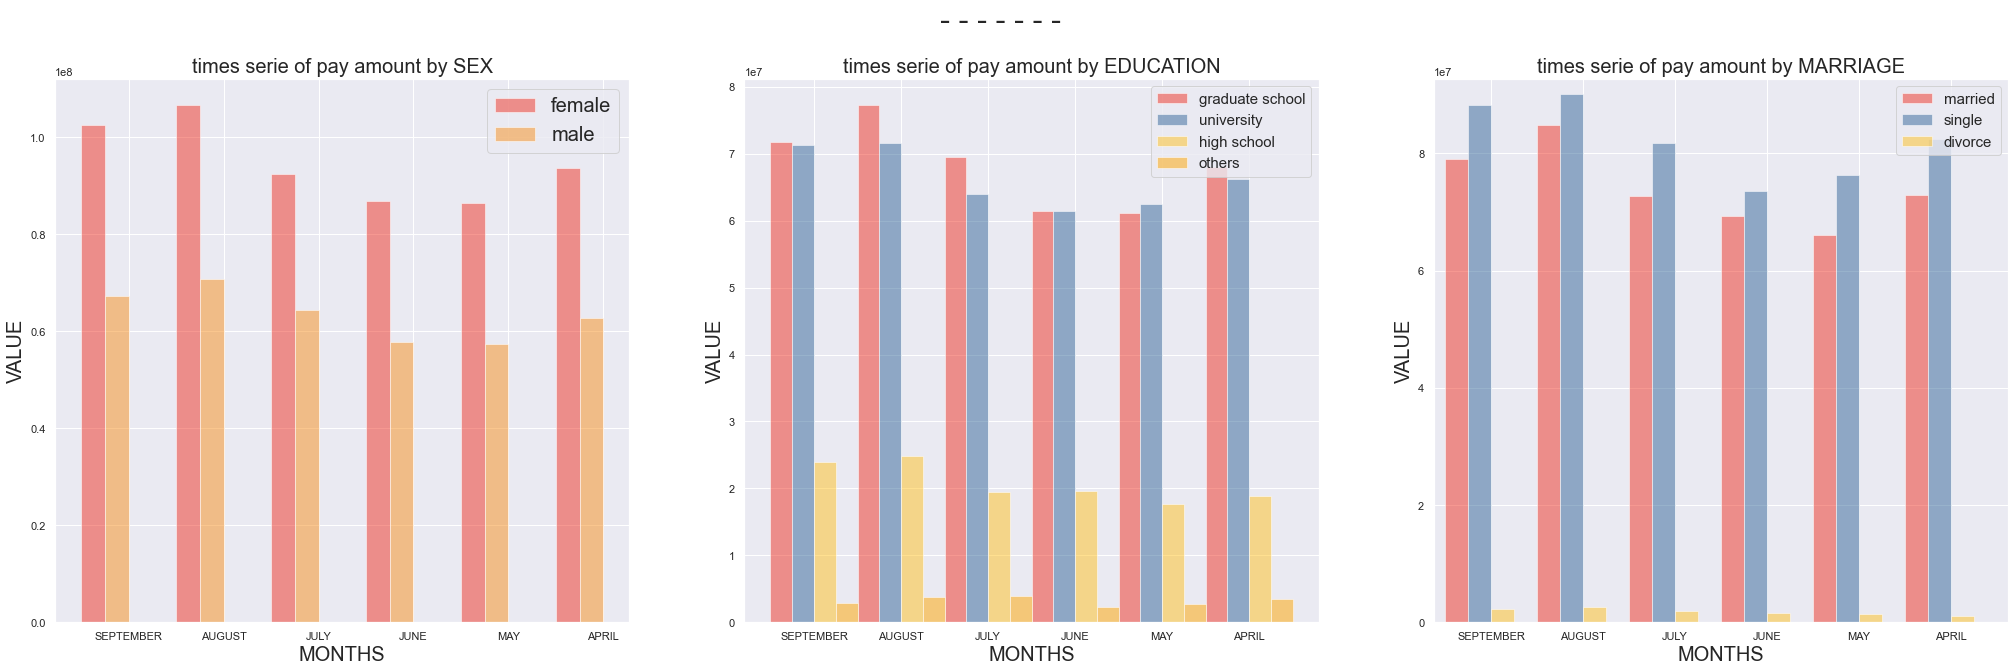

In [71]:
fig , axs= plt.subplots(1,3, figsize=(35,10)) 
fig.suptitle('- - - - - - -', fontsize=30)


pos = [0,1,2,3,4,5]
width = 0.25
axs[0].bar(pos,dff['female'],width,alpha=0.5,color='#EE3224',label=dff['MONTHS'][0])
#Création des barres avec mid_score
axs[0].bar([p + width for p in pos],dff['male'],width,alpha=0.5,color='#F78F1E',label=dff['MONTHS'][1])

ax1=axs[0]
ax1.set_ylabel('VALUE',fontsize=20)
ax1.set_xlabel('MONTHS',fontsize=20)
#Titre du graphique
ax1.set_title('times serie of pay amount by SEX', fontsize=20)
# position des ticks (position des groupes)
ax1.set_xticks([p + 1.5 * width for p in pos])
ax1.set_xticklabels(dff['MONTHS'])
# limite des axes
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(dff['female']+10000000 )] )
# Définition des légendes
ax1.legend(['female', 'male'], loc='upper right',fontsize=20)

##############

pos = [0,1,2,3,4,5]
width = 0.25

axs[1].bar(pos,dff_edu_pay['graduate school'],width,alpha=0.5,color='#EE3224',label=dff_edu_pay['MONTHS'][0])
axs[1].bar([p + width for p in pos],dff_edu_pay['university'],width,alpha=0.5,color=(0.2, 0.4, 0.6, 0.6),label=dff_edu_pay['MONTHS'][1])
axs[1].bar([p + width*2 for p in pos],dff_edu_pay['high school'],width,alpha=0.5,color='#FFC222',label=dff_edu_pay['MONTHS'][3])
axs[1].bar([p + width*3 for p in pos],dff_edu_pay['others'],width,alpha=0.5,color='orange',label=dff_edu_pay['MONTHS'][4])

ax2=axs[1]
ax2.set_ylabel('VALUE',fontsize=20)
ax2.set_xlabel('MONTHS',fontsize=20)
ax2.set_title('times serie of pay amount by EDUCATION', fontsize=20)
# position des ticks (position des groupes)
ax2.set_xticks([p + 1.5 * width for p in pos])
ax2.set_xticklabels(dff_edu_pay['MONTHS'])
# limite des axes
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max( dff_edu_pay['graduate school'] + dff_edu_pay['others'] )] )
# Définition des légendes
ax2.legend(['graduate school', 'university','high school', 'others'], loc='upper right',fontsize=15)

#############

pos = [0,1,2,3,4,5] 
width = 0.25
axs[2].bar(pos,dff_merr_pay['married'],width,alpha=0.5,color='#EE3224',label=dff_merr_pay['MONTHS'][0])
axs[2].bar([p + width for p in pos],dff_merr_pay['single'],width,alpha=0.5,color=(0.2, 0.4, 0.6, 0.6),label=dff_merr_pay['MONTHS'][1])
axs[2].bar([p + width*2 for p in pos],dff_merr_pay['divorce'],width,alpha=0.5,color='#FFC222',label=dff_merr_pay['MONTHS'][2])

ax3=axs[2]
ax3.set_ylabel('VALUE',fontsize=20)
ax3.set_xlabel('MONTHS',fontsize=20)
#Titre du graphique
ax3.set_title('times serie of pay amount by MARRIAGE', fontsize=20)
# position des ticks (position des groupes)
ax3.set_xticks([p + 1.5 * width for p in pos])
ax3.set_xticklabels(dff_merr_pay['MONTHS'])
# limite des axes
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max( dff_merr_pay['divorce'] + dff_merr_pay['single'] )] )
# Définition des légendes
ax3.legend(['married','single', 'divorce'], loc='upper right',fontsize=15)


plt.show()

when it comes to pays ammount it's basically the same as bill ammount however the only difference is that the people who graduated are the first ones to pay back their credits.

# <font color=003282> III. Data preparation: </font>

In [72]:
def clean(feat,out_v,coff_min,coff_max):
    Q1=out_v[feat].quantile(0.25)
    Q3=out_v[feat].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-coff_min*IQR
    upper_bound=Q3+coff_max*IQR
    upper_bound
    out_v=out_v[(out_v[feat]>lower_bound) &(out_v[feat]<upper_bound)]
    return out_v

In [73]:
# removing outlier
cred = df[(df['AGE']<=60) & (df['PAY_1']<=2) & (df['PAY_2']<=2) & (df['PAY_3']<=2) & (df['PAY_4']<=2) & (df['PAY_5']<=2) & (df['PAY_6']<=2) & (df['LIMIT_BAL']<=600000)  ]
col=['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Target']
X1=clean('BILL_AMT1', cred,2,10)
X2=clean('BILL_AMT2', X1,1.5,10)
X3=clean('BILL_AMT3', X2,1.5,10)
X4=clean('BILL_AMT4', X3,1.5,10)
X5=clean('BILL_AMT5', X4,1.5,10)
X6=clean('BILL_AMT6', X5,1.5,10)
X7=clean('PAY_AMT1', X6,1.5,150)
X8=clean('PAY_AMT2', X7,1.5,120)
X9=clean('PAY_AMT3', X8,1.5,100)
X10=clean('PAY_AMT4', X9,1.5,120)
X11=clean('PAY_AMT6', X10,1.5,120)
cred=X11

In [ ]:
fig, ax = plt.subplots(figsize=(18,18))
cred.boxplot()

In [74]:
# only 22 %
cred['target'].value_counts()

0    22604
1     5803
Name: target, dtype: int64

In [75]:
cred.shape

(28407, 24)

### <font color=maganta>Correlations</font></a>

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.                                                                         
The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:                                              

*   **00-.19 “very weak”**
*   **20-.39 “weak”**
*   **40-.59 “moderate”**
*   **60-.79 “strong”**
*   **80-1.0 “very strong”**

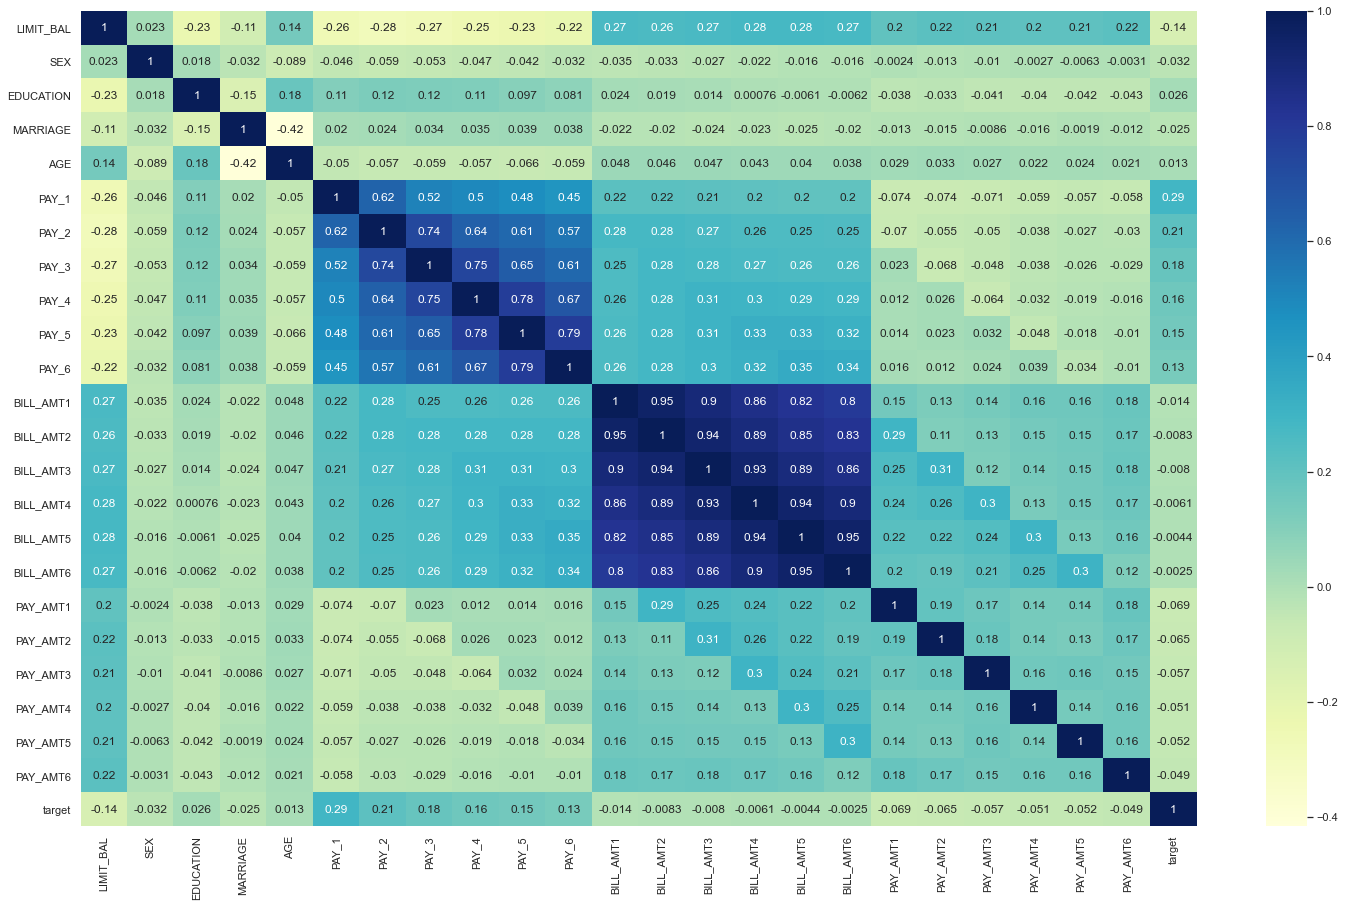

In [76]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(cred.corr(),annot=True,cmap="YlGnBu" , ax=ax);

In [77]:
corrs = cred.corr()

In [78]:
# Display correlations
print('Most Positive Correlations:\n')
corrs.tail(5)

Most Positive Correlations:



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
PAY_AMT3,0.213893,-0.010220,-0.040969,-0.008613,0.027227,-0.070809,-0.050228,-0.048003,-0.063701,0.032427,...,0.298453,0.237193,0.213217,0.167734,0.179892,1.000000,0.157381,0.160287,0.150164,-0.057117
PAY_AMT4,0.203655,-0.002660,-0.040259,-0.015529,0.021639,-0.059415,-0.037637,-0.037718,-0.032500,-0.047665,...,0.131083,0.301641,0.248918,0.137255,0.138071,0.157381,1.000000,0.141953,0.156050,-0.051327
PAY_AMT5,0.208239,-0.006291,-0.042157,-0.001902,0.023562,-0.056592,-0.026564,-0.025522,-0.019056,-0.017833,...,0.151123,0.132902,0.304713,0.138067,0.130514,0.160287,0.141953,1.000000,0.157146,-0.051611
PAY_AMT6,0.217259,-0.003150,-0.042913,-0.011687,0.020621,-0.058019,-0.029516,-0.028513,-0.015709,-0.010187,...,0.168533,0.158468,0.116393,0.183042,0.168159,0.150164,0.156050,0.157146,1.000000,-0.049178
target,-0.136890,-0.032354,0.025752,-0.025127,0.012976,0.289002,0.214277,0.182946,0.163633,0.149438,...,-0.006105,-0.004440,-0.002476,-0.069181,-0.065408,-0.057117,-0.051327,-0.051611,-0.049178,1.000000


In [79]:
print('\nMost Negative Correlations:\n')
corrs.head(5)


Most Negative Correlations:



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
LIMIT_BAL,1.000000,0.022617,-0.226944,-0.109257,0.144328,-0.259984,-0.280215,-0.268394,-0.249108,-0.231412,...,0.277542,0.279509,0.274007,0.197975,0.215278,0.213893,0.203655,0.208239,0.217259,-0.136890
SEX,0.022617,1.000000,0.017698,-0.032032,-0.089148,-0.045960,-0.059217,-0.053464,-0.047346,-0.042453,...,-0.021919,-0.016411,-0.016316,-0.002411,-0.012939,-0.010220,-0.002660,-0.006291,-0.003150,-0.032354
EDUCATION,-0.226944,0.017698,1.000000,-0.148951,0.180631,0.106774,0.122594,0.117834,0.111025,0.096897,...,0.000762,-0.006107,-0.006219,-0.037722,-0.033160,-0.040969,-0.040259,-0.042157,-0.042913,0.025752
MARRIAGE,-0.109257,-0.032032,-0.148951,1.000000,-0.416322,0.019733,0.023609,0.033684,0.035100,0.039024,...,-0.023472,-0.024860,-0.020029,-0.012651,-0.014736,-0.008613,-0.015529,-0.001902,-0.011687,-0.025127
AGE,0.144328,-0.089148,0.180631,-0.416322,1.000000,-0.049978,-0.057312,-0.059198,-0.057197,-0.065556,...,0.042789,0.040246,0.037812,0.028892,0.032546,0.027227,0.021639,0.023562,0.020621,0.012976


### <font color=BA4A00>Data Standarization </font></a>  

In [279]:
x=cred.drop('target', axis=1)
x = (x-x.mean())/x.std()
y = cred['target'].values

In [81]:
print ('The size of our Set "x" (input features without selecting the right features) is', x.shape)
print ('The size of our Set "y" (output feature) is', y.shape)

The size of our Set "x" (input features without selecting the right features) is (28407, 23)
The size of our Set "y" (output feature) is (28407,)


### <font color=BA4A00>Feature Selection</font></a>  

Three benefits of performing feature selection before modeling your data are:

*  Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
*  Improves Accuracy: Less misleading data means modeling accuracy improves.
*  Reduces Training Time: Less data means that algorithms train faster

##### <font color=E59866>Feature importance</font></a>  
Feature importance gives us a score for each feature of our data, the higher the score more important or relevant is the feature towards our output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 20 features for our dataset.

feature_importances of tree based classifiers:
 [0.06820307 0.01238486 0.03109589 0.02404002 0.06945541 0.09710944
 0.0401105  0.02665132 0.0236693  0.02658938 0.02282272 0.05252098
 0.04900962 0.04759803 0.04672681 0.04534577 0.04616447 0.0463931
 0.04473824 0.04373397 0.0432155  0.04413806 0.04828355]


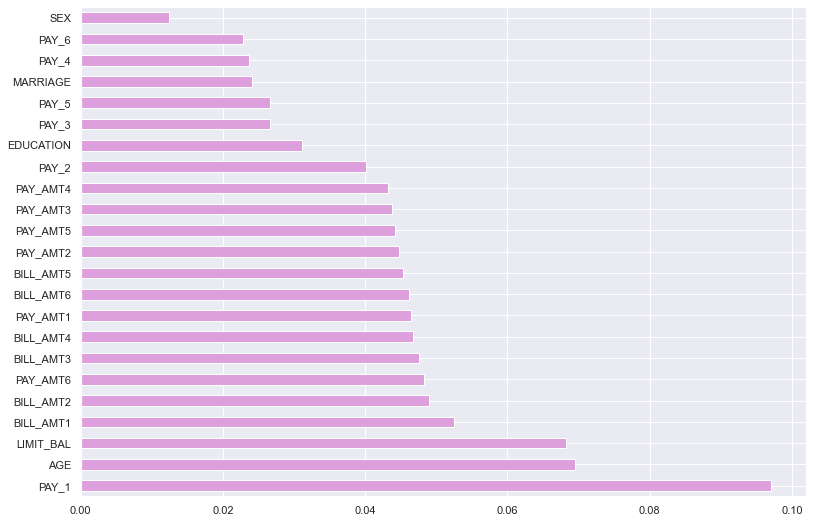

In [82]:
model = ExtraTreesClassifier()
model.fit(x,y)
plt.figure(figsize=(13,9))

print('feature_importances of tree based classifiers:\n',model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(23).plot(kind='barh',color='plum')
plt.show()

##### <font color=E59866>Feature Selection using ANOVA F-test</font></a>  

In [83]:
num_feats  = 23
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(x, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = x.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

15 selected features


In [84]:
print('selected features: \n',embeded_rf_feature)

selected features: 
 ['LIMIT_BAL', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [280]:
# Split-out validation dataset
validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=validation_size,random_state=42,shuffle=True)

In [281]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (22725, 23)
The size of our testing "X" (input features) is (5682, 23)
The size of our training "y" (output feature) is (22725,)
The size of our testing "y" (output features) is (5682,)


# <font color=003282> IV. Modeling : </font>

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [283]:
yhat_lr = LR.predict(X_test)
yhat_lr

array([0, 0, 1, ..., 0, 0, 0], dtype=int8)

In [284]:
from sklearn.metrics import classification_report
print(classification_report(yhat_lr, y_test))


              precision    recall  f1-score   support

           0       0.98      0.82      0.90      5394
           1       0.18      0.71      0.28       288

    accuracy                           0.82      5682
   macro avg       0.58      0.77      0.59      5682
weighted avg       0.94      0.82      0.86      5682



In [285]:
yhat_prob = LR.score(X_test,y_test)
yhat_prob

0.8171418514607532

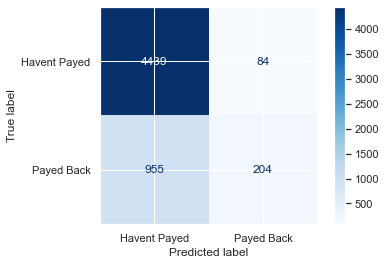

In [93]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, X_test, y_test, display_labels=['Havent Payed','Payed Back'], cmap=plt.cm.Blues)
plt.show()

As you can see, we started with LR which gave us an pretty much accurate recall, f-score and accuracy since the problem itself is compatible with this model as we have two classes 0 and 1.

# KNN


Text(0, 0.5, 'Score')

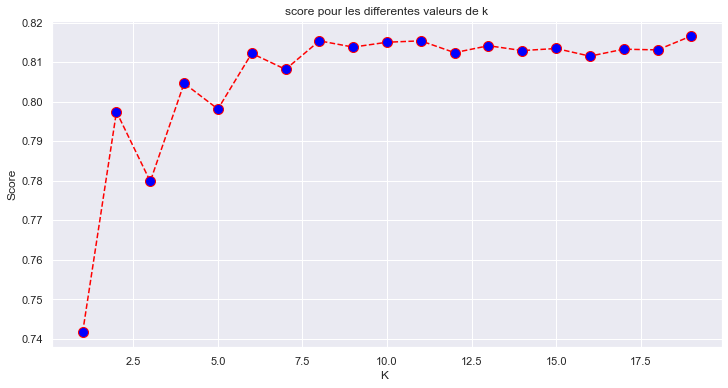

In [94]:
score = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
# Tester k de 1 à 40 et la distance Manhattan
for i in range(1,20):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train.ravel())
    pred_knn = knn_model.predict(X_test)
    score.append(knn_model.score(X_test, y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('score pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Score')

In [287]:
knn = KNeighborsClassifier(20,metric='manhattan')
knn_model = knn.fit(X_train, y_train.ravel())
pred_knn = knn_model.predict(X_test)
score=knn_model.score(X_test, y_test)
score

0.8150299190425906

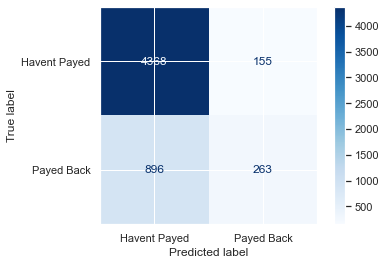

In [96]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, display_labels=['Havent Payed','Payed Back'], cmap=plt.cm.Blues)
plt.show()

In [97]:
from sklearn.metrics import classification_report
print(classification_report(pred_knn, y_test))


              precision    recall  f1-score   support

           0       0.97      0.83      0.89      5264
           1       0.23      0.63      0.33       418

    accuracy                           0.82      5682
   macro avg       0.60      0.73      0.61      5682
weighted avg       0.91      0.82      0.85      5682



KNN was also an accurate model we has to test multiple points and we got fixated on 20 since after 20 the score wont change so much and as you can see the function is logarithmic so it's not worth it to add points and make the the execution time longer

# SVM

In [288]:
svm = SVC()
svm.fit(X_train, y_train.ravel())

SVC()

In [289]:
from sklearn.metrics import classification_report
y_pred_svm= svm.predict(X_test)
print(classification_report(y_pred_svm, y_test))


              precision    recall  f1-score   support

           0       0.97      0.84      0.90      5238
           1       0.27      0.69      0.38       444

    accuracy                           0.83      5682
   macro avg       0.62      0.77      0.64      5682
weighted avg       0.91      0.83      0.86      5682



In [100]:
score=svm.score(X_test, y_test)
score

0.8262935586061246

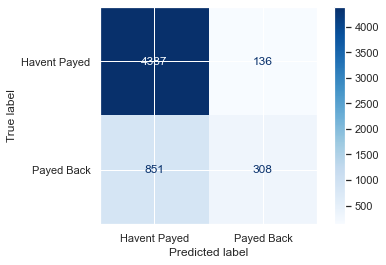

In [101]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm, X_test, y_test, display_labels=['Havent Payed','Payed Back'], cmap=plt.cm.Blues)
plt.show()

In [ ]:
#rbf:81,3
#linear: 0.801
#sigmoid:0.69
#polynomial:0.8

the SVM since it''s a classification model it was able to make a good prediction on the dataset by adding 1 dimention using the RBF function which is the default one and made the best accuracy.
we also tried multible kernel function but the stuck on the RBF since it's the best one

# Decision Tree


In [132]:
dt = DecisionTreeClassifier()

In [133]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [134]:
print('Le test score est :', dt.score(X_test, y_test))

Le test score est : 0.7265047518479408


In [135]:
names=cred.columns.values
names
dt.feature_importances_

array([0.05684804, 0.0092856 , 0.0203608 , 0.01606293, 0.07140737,
       0.13876387, 0.02800336, 0.00727918, 0.00759018, 0.00794273,
       0.00907085, 0.07435068, 0.05221339, 0.04772331, 0.05059097,
       0.05048965, 0.04989446, 0.04516089, 0.04929247, 0.06504734,
       0.04182952, 0.04807668, 0.05271575])

In [136]:
for var, importance in zip(names, dt.feature_importances_):
    if importance != 0:
        print(var, importance)

LIMIT_BAL 0.05684803546284698
SEX 0.009285596387113088
EDUCATION 0.02036079757775839
MARRIAGE 0.016062926865502414
AGE 0.07140737019527835
PAY_1 0.13876387482760025
PAY_2 0.028003358616812052
PAY_3 0.007279180439661468
PAY_4 0.007590178084718391
PAY_5 0.007942727232726432
PAY_6 0.00907085171961463
BILL_AMT1 0.07435067607290527
BILL_AMT2 0.052213392583236276
BILL_AMT3 0.04772330509157235
BILL_AMT4 0.05059096770735828
BILL_AMT5 0.050489651705559545
BILL_AMT6 0.04989445944938545
PAY_AMT1 0.04516089430579014
PAY_AMT2 0.04929246670079243
PAY_AMT3 0.06504733808295107
PAY_AMT4 0.041829521841717766
PAY_AMT5 0.04807668206059173
PAY_AMT6 0.05271574698850703


In [137]:
from sklearn.metrics import classification_report
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred ))


              precision    recall  f1-score   support

           0       0.84      0.81      0.83      4523
           1       0.35      0.39      0.37      1159

    accuracy                           0.73      5682
   macro avg       0.59      0.60      0.60      5682
weighted avg       0.74      0.73      0.73      5682



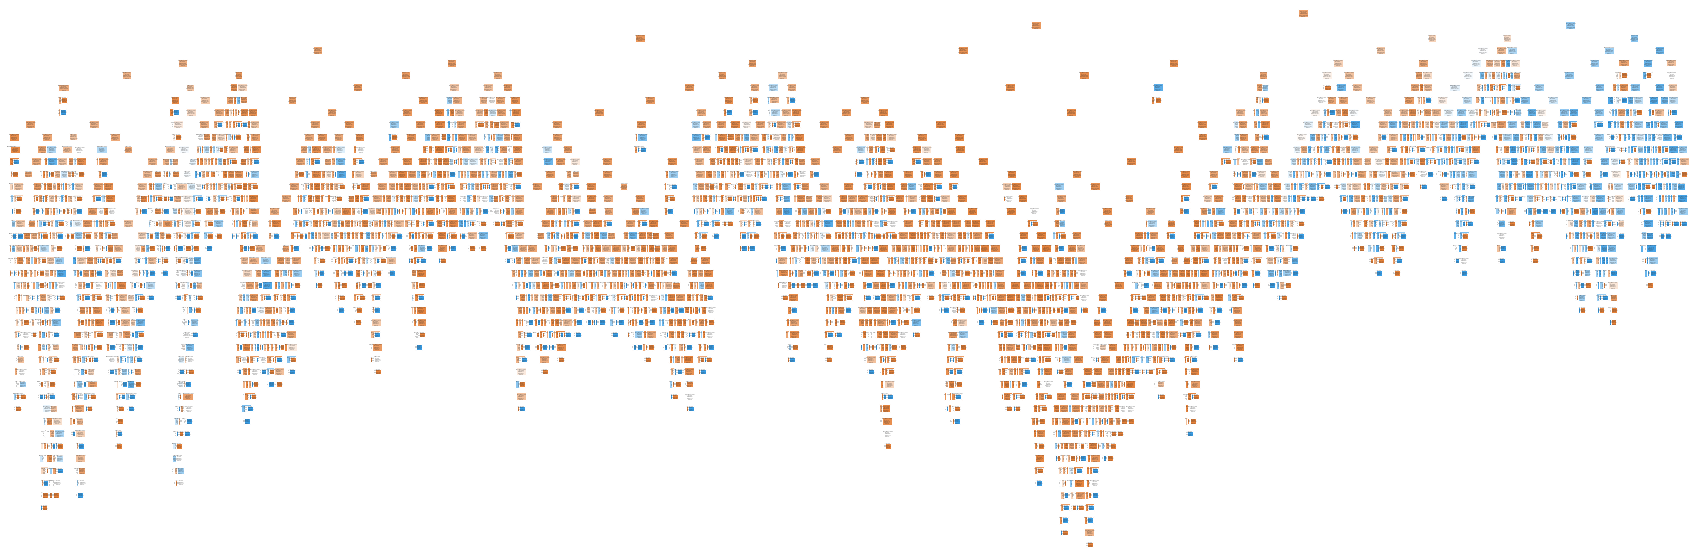

In [121]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,10)) 
plot_tree(dt, feature_names= names, class_names=['0','1'], filled=True)
plt.show() 

as you can see the default decision tree looks something like the map of the world as we have many parameters in our dataset so the default value wont be that accurate

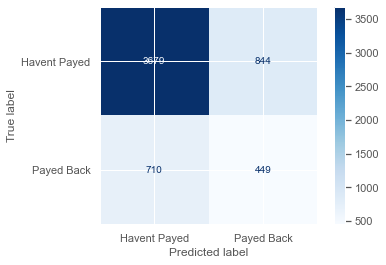

In [138]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test, display_labels=['Havent Payed','Payed Back'], cmap=plt.cm.Blues)
plt.show()

In [291]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=5)

In [292]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,10)}

In [293]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [294]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [295]:
final_model = DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=3)

In [296]:
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [297]:
print( 'le test_score=',final_model.score(X_test, y_test))

le test_score= 0.8289334741288279


In [299]:
from sklearn.metrics import classification_report
y_pred_dt = final_model.predict(X_test)
print(classification_report(y_test, y_pred_dt, digits=8))


              precision    recall  f1-score   support

           0  0.84630388 0.95931904 0.89927461      4523
           1  0.66846847 0.32010354 0.43290548      1159

    accuracy                      0.82893347      5682
   macro avg  0.75738617 0.63971129 0.66609005      5682
weighted avg  0.81002946 0.82893347 0.80414582      5682



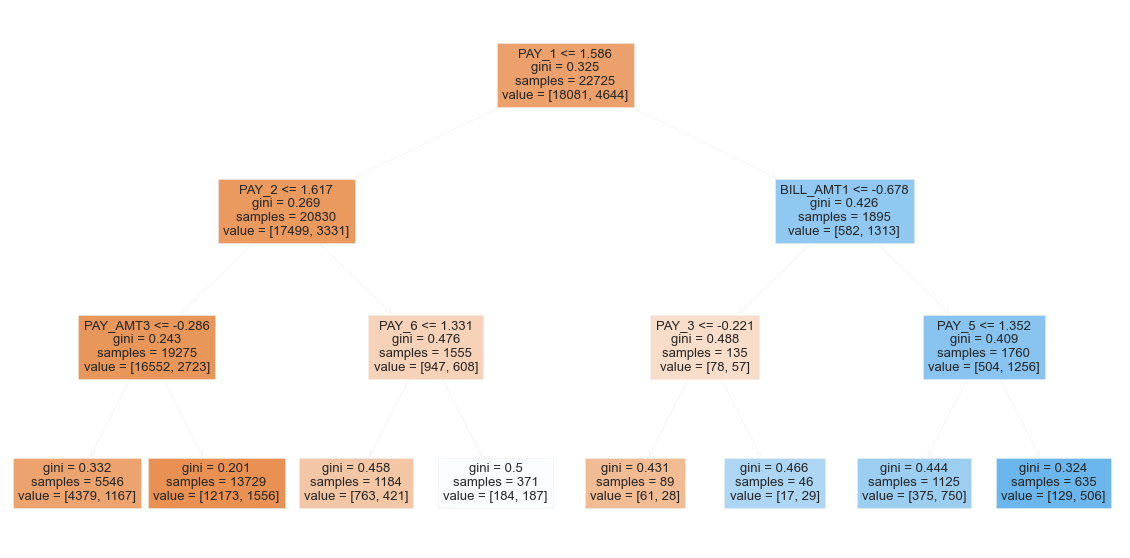

In [151]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(final_model, feature_names= names, filled=True)
plt.show()

after we altered the parameters using the GridSearchCV we changed the depth and the criterion and we got much better results

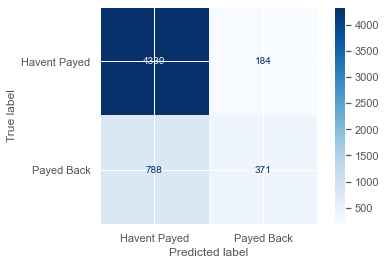

In [152]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, X_test, y_test, display_labels=['Havent Payed','Payed Back'], cmap=plt.cm.Blues)
plt.show()

# Random Forest

In [300]:
RM = RandomForestClassifier()

In [301]:
RM.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [302]:
yhat_rm = RM.predict(X_test)
yhat_rm

array([0, 0, 1, ..., 0, 0, 0], dtype=int8)

In [303]:
print( 'le test_score=',RM.score(X_test, y_test))

le test_score= 0.8238296374516015


In [157]:
final_model = RandomForestClassifier(random_state=1,criterion='gini', max_depth=3)

In [162]:
final_model.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=3, random_state=1)

In [163]:
print( 'le test_score=',final_model.score(X_test, y_test))

le test_score= 0.8127419922562478


In [164]:
from sklearn.metrics import classification_report
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=8))


              precision    recall  f1-score   support

           0  0.82152817 0.97700641 0.89254696      4523
           1  0.65676568 0.17169974 0.27222982      1159

    accuracy                      0.81274199      5682
   macro avg  0.73914692 0.57435308 0.58238839      5682
weighted avg  0.78792033 0.81274199 0.76601624      5682



the random forest classifier is a lot more democratic than the decision tree since the creation of multiple trees should make the accuracy higher, howerver with multiple feature and rows it bootstraped dataset won't allow us to make a good prediction 
and that's why the decision tree classifier gave better results

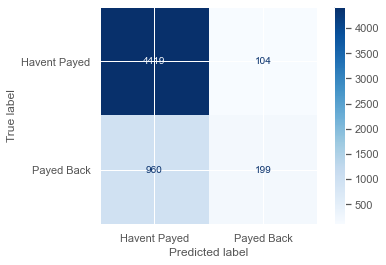

In [165]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, X_test, y_test, display_labels=['Havent Payed','Payed Back'], cmap=plt.cm.Blues)
plt.show()

## Tuning the hyperparameters

In [166]:
from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_depth=4, 
                                random_state=1)
    rf.fit(X_train, y_train.ravel())
    prediction_test = rf.predict(X=X_test)
print( 'le test_score=',rf.score(X_test, y_test))

le test_score= 0.8164378739880324


# Adaboost


we got the amount of say with the number of errors and the sample weight which is the default weight of each feature
new sample weight= sample weight*e-amount of say 

since the DT and RF wheren't much of success we had to use ADAboost since it gather the two best sides of DT and RF.
it can order the features depending on their importance and create multiple trees with giving them vote values proportinal to their importance 

In [304]:
AdaBoost = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=300, random_state=None)

In [305]:
model =AdaBoost.fit(X_train, y_train.ravel())

In [306]:
print( 'le test_score=',model.score(X_test, y_test))

le test_score= 0.8213657162970784


In [307]:
y_pred_ada = model.predict(X_test)
y_pred_ada

array([0, 0, 1, ..., 0, 0, 0], dtype=int8)

In [318]:
print(classification_report(y_test, y_pred_ada, digits=8))


              precision    recall  f1-score   support

           0  0.83939628 0.95909794 0.89526365      4523
           1  0.64007782 0.28386540 0.39330544      1159

    accuracy                      0.82136572      5682
   macro avg  0.73973705 0.62148167 0.64428454      5682
weighted avg  0.79873981 0.82136572 0.79287548      5682



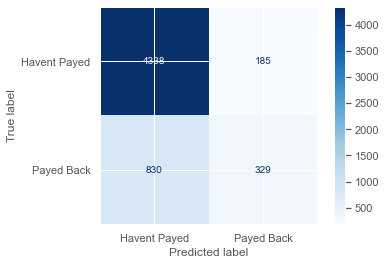

In [172]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(AdaBoost, X_test, y_test, display_labels=['Havent Payed','Payed Back'], cmap=plt.cm.Blues)
plt.show()

# Naive Bayes

In [173]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()


In [174]:
NB.fit(X_train,y_train.ravel())

GaussianNB()

In [175]:
NB.score(X_test,y_test)

0.7608236536430835

In [176]:
y_pred_naive = NB.predict(X_test)
y_pred_naive

array([0, 0, 1, ..., 1, 0, 1], dtype=int8)

In [177]:
print(classification_report(y_test, y_pred, digits=8))


              precision    recall  f1-score   support

           0  0.82152817 0.97700641 0.89254696      4523
           1  0.65676568 0.17169974 0.27222982      1159

    accuracy                      0.81274199      5682
   macro avg  0.73914692 0.57435308 0.58238839      5682
weighted avg  0.78792033 0.81274199 0.76601624      5682



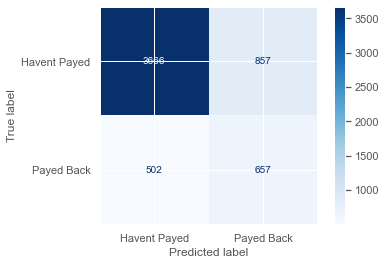

In [178]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(NB, X_test, y_test, display_labels=['Havent Payed','Payed Back'], cmap=plt.cm.Blues)
plt.show()

Naive Bayes Handles irrelevant features and Supports binary and multi-class classification problems that's why it gave us probably the best recall and f-score since our data set was a bit imbalaced at the begening and NB adapted very well 

# Neural Networks

In [179]:
#Function to create model,for KerasClassifier
#defining my model
mymodel = Sequential()
mymodel.add(Dense(36, input_dim=23, activation='relu'))
mymodel.add(Dense(23, activation='relu'))
mymodel.add(Dense(1, activation='sigmoid'))
# Compile the model
mymodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [180]:
# create model
mymodel.fit(X_train, y_train.ravel(),epochs=150,batch_size=10)

Epoch 1/150
2273/2273 [==============================] - 6s 2ms/step - loss: 0.4591 - accuracy: 0.8185
Epoch 2/150
2273/2273 [==============================] - 6s 3ms/step - loss: 0.4301 - accuracy: 0.8282
Epoch 3/150
2273/2273 [==============================] - 5s 2ms/step - loss: 0.4250 - accuracy: 0.8275
Epoch 4/150
2273/2273 [==============================] - 5s 2ms/step - loss: 0.4229 - accuracy: 0.8286
Epoch 5/150
2273/2273 [==============================] - 5s 2ms/step - loss: 0.4206 - accuracy: 0.8281
Epoch 6/150
2273/2273 [==============================] - 5s 2ms/step - loss: 0.4187 - accuracy: 0.8289
Epoch 7/150
2273/2273 [==============================] - 5s 2ms/step - loss: 0.4174 - accuracy: 0.8286
Epoch 8/150
2273/2273 [==============================] - 6s 2ms/step - loss: 0.4161 - accuracy: 0.8296
Epoch 9/150
2273/2273 [==============================] - 5s 2ms/step - loss: 0.4151 - accuracy: 0.8298
Epoch 10/150
2273/2273 [==============================] - 5s 2ms/step - l

In [181]:
y,accuracy=mymodel.evaluate(X_train, y_train.ravel())
accuracy

711/711 [==============================] - 1s 2ms/step - loss: 0.3512 - accuracy: 0.8527


0.8526732921600342

In [184]:
NNV = mymodel.predict(X_test)
NNV=(y_predtt>0.5)
print(classification_report(y_test, NNV, digits=8))

              precision    recall  f1-score   support

           0  0.84481378 0.93278797 0.88662394      4523
           1  0.55813953 0.33132010 0.41580942      1159

    accuracy                      0.81010208      5682
   macro avg  0.70147666 0.63205404 0.65121668      5682
weighted avg  0.78633869 0.81010208 0.79058838      5682



    Neural Network has The ability to work with insufficient knowledg and it has Good falt tolerance. that's why it gave us the best accuracy but with the price of a long excecution time

# XGBoost

In [312]:
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [314]:
model_xgboost = xgb.XGBClassifier(learning_rate=0.1,max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)

eval_set = [(X_test, y_test.ravel())]

# fit the model with the training data
model_xgboost.fit(X_train, y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)
y_valid_pred = model_xgboost.predict_proba(X_test)[:,1]

print("AUC Valid: {:.4f}".format(roc_auc_score(y_test, y_valid_pred)))

[0]	validation_0-auc:0.68736
[1]	validation_0-auc:0.70759
[2]	validation_0-auc:0.74957


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[3]	validation_0-auc:0.75406
[4]	validation_0-auc:0.75347
[5]	validation_0-auc:0.75781
[6]	validation_0-auc:0.75770
[7]	validation_0-auc:0.76116
[8]	validation_0-auc:0.76198
[9]	validation_0-auc:0.76332
[10]	validation_0-auc:0.76356
[11]	validation_0-auc:0.76368
[12]	validation_0-auc:0.76337
[13]	validation_0-auc:0.76374
[14]	validation_0-auc:0.76459
[15]	validation_0-auc:0.76412
[16]	validation_0-auc:0.76559
[17]	validation_0-auc:0.76603
[18]	validation_0-auc:0.76679
[19]	validation_0-auc:0.76786
[20]	validation_0-auc:0.76880
[21]	validation_0-auc:0.76898
[22]	validation_0-auc:0.76923
[23]	validation_0-auc:0.76974
[24]	validation_0-auc:0.77016
[25]	validation_0-auc:0.77058
[26]	validation_0-auc:0.77100
[27]	validation_0-auc:0.77048
[28]	validation_0-auc:0.77049
[29]	validation_0-auc:0.77173
[30]	validation_0-auc:0.77117
[31]	validation_0-auc:0.77110
[32]	validation_0-auc:0.77092
[33]	validation_0-auc:0.77092
[34]	validation_0-auc:0.77155
[35]	validation_0-auc:0.77192
[36]	validation_0

In [187]:
xgb = model_xgboost.predict(X_test)
xgb=(y_valid_pred>0.5)
print(classification_report(y_test, xgb, digits=8))

              precision    recall  f1-score   support

           0  0.84146577 0.96462525 0.89884631      4523
           1  0.67806841 0.29076790 0.40700483      1159

    accuracy                      0.82717353      5682
   macro avg  0.75976709 0.62769658 0.65292557      5682
weighted avg  0.80813639 0.82717353 0.79852173      5682



# SMOTE

SMOTE allows has the ability te balance the values of the dataset. As a consequence the models won't be affected with the fact that 80% of the people haven't reached their target which will give us better recall and f-score even tho the score won't be higher.
Notice all the classification reports Below:


## SMOTE+LR

In [207]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [227]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=20, random_state=100)
X_res, y_res = sm.fit_resample(X_train, y_train)
validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,test_size=validation_size,random_state=42,shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (18544, 23) (18544,)
Test set: (4636, 23) (4636,)


In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_test, y_test)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [229]:
LL = LR.predict(X_test)
LL

array([1, 1, 1, ..., 1, 0, 1], dtype=int8)

In [230]:
from sklearn.metrics import classification_report
print(classification_report( y_test,LL))


              precision    recall  f1-score   support

           0       0.65      0.60      0.63      2325
           1       0.63      0.67      0.65      2311

    accuracy                           0.64      4636
   macro avg       0.64      0.64      0.64      4636
weighted avg       0.64      0.64      0.64      4636



In [231]:
yhat_prob = LR.score(X_test,y_test)
yhat_prob

0.636755823986195

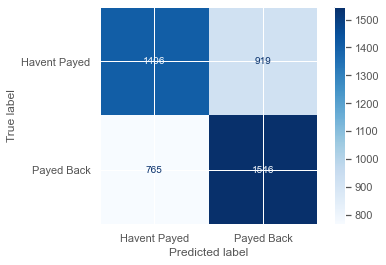

In [232]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, X_test, y_test, display_labels=['Havent Payed','Payed Back'], cmap=plt.cm.Blues)
plt.show()

## SMOTE+KNN

In [233]:
knn = KNeighborsClassifier(20,metric='manhattan')
knn_model = knn.fit(X_test, y_test)
pred_i = knn_model.predict(X_test)
score=knn_model.score(X_test, y_test)
score

0.7148403796376186

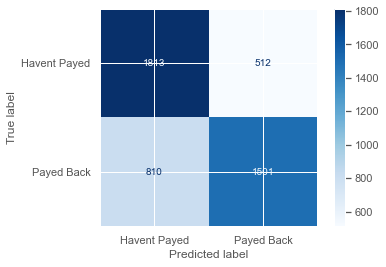

In [234]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, display_labels=['Havent Payed','Payed Back'], cmap=plt.cm.Blues)
plt.show()

In [235]:
from sklearn.metrics import classification_report
y_pred_svc_1 = LR.predict(X_test)
print(classification_report(y_pred_svc_1, y_test))


              precision    recall  f1-score   support

           0       0.60      0.65      0.63      2171
           1       0.67      0.63      0.65      2465

    accuracy                           0.64      4636
   macro avg       0.64      0.64      0.64      4636
weighted avg       0.64      0.64      0.64      4636



In [236]:
yhat_prob = LR.score(X_test,y_test)
yhat_prob

0.636755823986195

## SMOTE+SVM

In [237]:
svm = SVC()
svm.fit(X_test, y_test)

SVC()

In [238]:
from sklearn.metrics import classification_report
y_pred_svc_1 = svm.predict(X_test)
print(classification_report(y_pred_svc_1, y_test))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75      3056
           1       0.55      0.81      0.65      1580

    accuracy                           0.71      4636
   macro avg       0.71      0.73      0.70      4636
weighted avg       0.76      0.71      0.72      4636



In [239]:
score=svm.score(X_test, y_test)
score

0.7103106125970664

In [240]:
from sklearn.metrics import classification_report
y_pred_svc_1 = svm.predict(X_test)
print(classification_report(y_pred_svc_1, y_test))


              precision    recall  f1-score   support

           0       0.87      0.66      0.75      3056
           1       0.55      0.81      0.65      1580

    accuracy                           0.71      4636
   macro avg       0.71      0.73      0.70      4636
weighted avg       0.76      0.71      0.72      4636



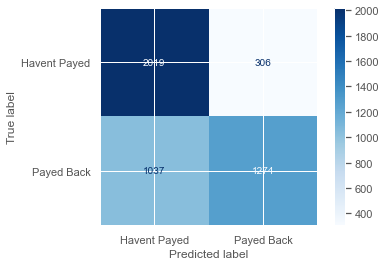

In [241]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm, X_test, y_test, display_labels=['Havent Payed','Payed Back'], cmap=plt.cm.Blues)
plt.show()

## SMOTE+DT

In [242]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=5)

In [243]:
grid.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [244]:
final_model = DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=3)

In [245]:
final_model.fit(X_test, y_test)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [246]:
print( 'le test_score=',final_model.score(X_test, y_test))

le test_score= 0.6878774805867127


In [247]:
from sklearn.metrics import classification_report
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=8))


              precision    recall  f1-score   support

           0  0.69936421 0.66236559 0.68036227      2325
           1  0.67748562 0.71354392 0.69504742      2311

    accuracy                      0.68787748      4636
   macro avg  0.68842492 0.68795476 0.68770484      4636
weighted avg  0.68845795 0.68787748 0.68768267      4636



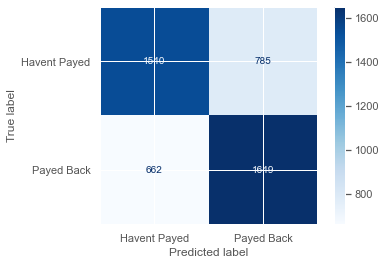

In [248]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, X_test, y_test, display_labels=['Havent Payed','Payed Back'], cmap=plt.cm.Blues)
plt.show()

## SMOTE+ADABOOST

In [249]:
AdaBoost = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=300, random_state=None)

In [250]:
model =AdaBoost.fit(X_test, y_test)

In [251]:
print( 'le test_score=',model.score(X_test, y_test))

le test_score= 0.8330457290767903


In [252]:
print(classification_report(y_test, y_pred, digits=8))


              precision    recall  f1-score   support

           0  0.69936421 0.66236559 0.68036227      2325
           1  0.67748562 0.71354392 0.69504742      2311

    accuracy                      0.68787748      4636
   macro avg  0.68842492 0.68795476 0.68770484      4636
weighted avg  0.68845795 0.68787748 0.68768267      4636



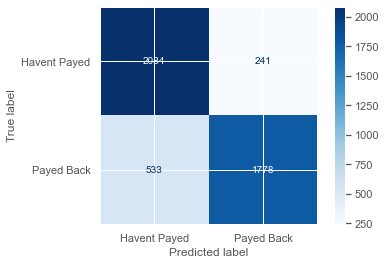

In [253]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(AdaBoost, X_test, y_test, display_labels=['Havent Payed','Payed Back'], cmap=plt.cm.Blues)
plt.show()

## SMOTE+NN

In [254]:
# Function to create model,for KerasClassifier
    #defining my model
mymodel = Sequential()
mymodel.add(Dense(36, input_dim=23, activation='relu'))
mymodel.add(Dense(23, activation='relu'))
mymodel.add(Dense(1, activation='sigmoid'))
    # Compile the model
mymodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# create model
mymodel.fit(X_test, y_test,epochs=150,batch_size=10)

In [ ]:
y,accuracy=mymodel.evaluate(X_train, y_train.ravel())
accuracy

In [ ]:
y_predtt = mymodel.predict(X_test)
y_predtt=(y_predtt>0.5)
print(classification_report(y_test, y_predtt, digits=8))

## SOMTE +XGBoost

In [262]:
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [263]:
model_xgboost = xgb.XGBClassifier(learning_rate=0.1,max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)

eval_set = [(X_test, y_test.ravel())]

# fit the model with the training data
model_xgboost.fit(X_train, y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)
y_valid_pred = model_xgboost.predict_proba(X_test)[:,1]

print("AUC Valid: {:.4f}".format(roc_auc_score(y_test, y_valid_pred)))

[0]	validation_0-auc:0.72536
[1]	validation_0-auc:0.74290
[2]	validation_0-auc:0.75531
[3]	validation_0-auc:0.78279


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[4]	validation_0-auc:0.78785
[5]	validation_0-auc:0.79043
[6]	validation_0-auc:0.79458
[7]	validation_0-auc:0.82067
[8]	validation_0-auc:0.82963
[9]	validation_0-auc:0.83597
[10]	validation_0-auc:0.84612
[11]	validation_0-auc:0.84943
[12]	validation_0-auc:0.85051
[13]	validation_0-auc:0.85136
[14]	validation_0-auc:0.85393
[15]	validation_0-auc:0.85864
[16]	validation_0-auc:0.86022
[17]	validation_0-auc:0.86466
[18]	validation_0-auc:0.86463
[19]	validation_0-auc:0.86579
[20]	validation_0-auc:0.86649
[21]	validation_0-auc:0.86580
[22]	validation_0-auc:0.86737
[23]	validation_0-auc:0.86908
[24]	validation_0-auc:0.87009
[25]	validation_0-auc:0.87470
[26]	validation_0-auc:0.87569
[27]	validation_0-auc:0.87871
[28]	validation_0-auc:0.88264
[29]	validation_0-auc:0.88373
[30]	validation_0-auc:0.88631
[31]	validation_0-auc:0.88756
[32]	validation_0-auc:0.88806
[33]	validation_0-auc:0.88945
[34]	validation_0-auc:0.89043
[35]	validation_0-auc:0.89019
[36]	validation_0-auc:0.89093
[37]	validation_

In [264]:
xgb = model_xgboost.predict(X_test)
xgb=(y_valid_pred>0.5)
print(classification_report(y_test, xgb, digits=8))

              precision    recall  f1-score   support

           0  0.83539413 0.92989247 0.88011398      2325
           1  0.92041016 0.81566421 0.86487727      2311

    accuracy                      0.87295082      4636
   macro avg  0.87790214 0.87277834 0.87249562      4636
weighted avg  0.87777377 0.87295082 0.87251863      4636



# V. Evaluation

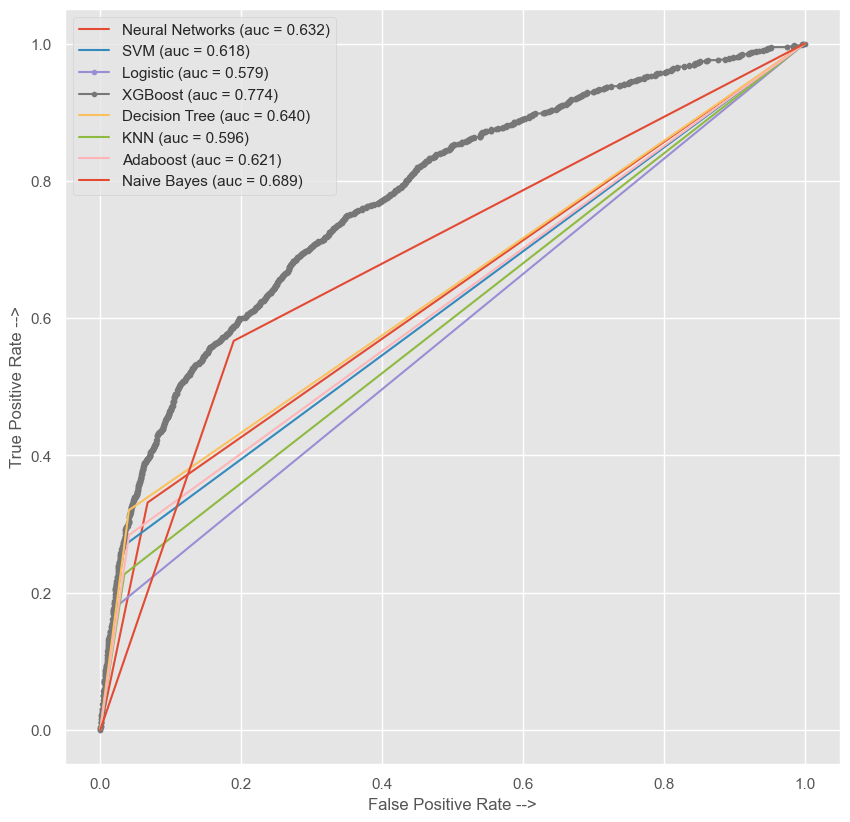

In [316]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, yhat_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_valid_pred)
auc_xgb = auc(xgb_fpr, xgb_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, y_pred_dt)
auc_dt = auc(dt_fpr, dt_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(y_test, pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

nn_fpr, nn_tpr, threshold = roc_curve(y_test, NNV)
auc_nn= auc(nn_fpr, nn_tpr)

ada_fpr, ada_tpr, threshold = roc_curve(y_test, y_pred_ada)
auc_ada = auc(ada_fpr, ada_tpr)

nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_naive)
auc_nb = auc(nb_fpr, nb_tpr)


plt.figure(figsize=(10, 10), dpi=100)
plt.plot(nn_fpr, nn_tpr, linestyle='-', label='Neural Networks (auc = %0.3f)' % auc_nn)

plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost (auc = %0.3f)' % auc_xgb)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='Decision Tree (auc = %0.3f)' % auc_dt)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_knn)
plt.plot(ada_fpr, ada_tpr, linestyle='-', label='Adaboost (auc = %0.3f)' % auc_ada)
plt.plot(nb_fpr, nb_tpr, linestyle='-', label='Naive Bayes (auc = %0.3f)' % auc_nb)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()